In [1]:
# 最新maersk 数据  
# 区间预测  
# 盈利预测

In [2]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot  as plt

In [3]:
data =pd.read_csv('maserk_price_online.csv',encoding ='utf-8') # 523909
print(data.shape)
data.head()

(533508, 20)


carrier_id  receipt_terminal_id  from_terminal_id  discharging_terminal_id  \
0        4550                 7995              7995                    29881   
1        4550                 7995              7995                    29881   
2        4550                 7995              7995                    29881   
3        4550                 7995              7995                    29881   
4        4550                 7995              7995                    29881   

   destination_terminal_id         etd vessel_name voyage     line_code  \
0                     9865  2020-09-24   ALS CERES   038S  Intra Asia 1   
1                     9865  2020-09-25   ALS CERES   038S  Intra Asia 1   
2                     9865  2020-09-24   ALS CERES   038S  Intra Asia 1   
3                     9865  2020-09-24   ALS CERES   038S  Intra Asia 1   
4                     8375  2020-09-24   ALS CERES   038S  Intra Asia 1   

  price_unit   price  priority           valid_from             valid_to  \
0       40GP  6000.0         1  2020-09-10 14:45:00  2020-09-11 00:08:24   
1       40GP  6000.0         1  2020-09-14 18:44:13                  NaN   
2       40HQ  6100.0         1  2020-09-10 10:44:16  2020-09-10 12:44:17   
3       40GP  6000.0         1  2020-09-10 10:44:16  2020-09-10 12:44:17   
4       20GP  1008.0         1  2020-09-08 18:38:18  2020-09-08 23:51:27   

  pol_name   pod_name linecodename  linecodeparentid  type  baseporttype  
0  QINGDAO       TEMA           西非             18851     1             1  
1  QINGDAO       TEMA           西非             18851     1             1  
2  QINGDAO       TEMA           西非             18851     1             1  
3  QINGDAO       TEMA           西非             18851     1             1  
4  QINGDAO  ROTTERDAM           欧洲             18843     1             1

In [4]:
data= data[(data['receipt_terminal_id'] ==data['from_terminal_id'])&(data['discharging_terminal_id']==data['destination_terminal_id'])]

data['etd'] = pd.to_datetime(data['etd'])
#data=data[('2020-08-30 00:00:00'<=data['etd'])&(data['etd']<='2020-9-15 00:00:00')] # 保证存在一个周期内

#valid_from,valid_to 去重
data['valid_from'] = pd.to_datetime(data['valid_from']).dt.floor('d')
data['valid_to'] = pd.to_datetime(data['valid_to']).dt.floor('d')
data_20gp =data[data['price_unit'] == '20GP']

data_20gp_col =data_20gp[['linecodeparentid','linecodename', 'pol_name','pod_name','valid_from','price','etd','vessel_name','voyage']]
data_20gp_col['gap'] =pd.DataFrame(pd.to_datetime(data_20gp_col['etd']) -pd.to_datetime(data_20gp_col['valid_from']))
data_20gp_col['gap'] =data_20gp_col['gap'].map(lambda x:x.days)
data_20gp_col= data_20gp_col.drop_duplicates()
data_20gp_col = data_20gp_col.dropna(axis=0,how='any')
data_20gp_col.sort_values(by=['pol_name','pod_name','vessel_name','etd','valid_from'],ascending=(False,False,False,False,True)).head()

data_20gp_col.info()

C:\Users\FJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\FJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 69587 entries, 10 to 533494
Data columns (total 10 columns):
linecodeparentid    69587 non-null int64
linecodename        69587 non-null object
pol_name            69587 non-null object
pod_name            69587 non-null object
valid_from          69587 non-null datetime64[ns]
price               69587 non-null float64
etd                 69587 non-null datetime64[ns]
vessel_name         69587 non-null object
voyage              69587 non-null object
gap                 69587 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 5.8+ MB


In [5]:
data['valid_from'].min(),data['valid_from'].max()
# data[data['etd'] =='2020-10-11']

(Timestamp('2020-08-01 00:00:00'), Timestamp('2020-09-14 00:00:00'))

In [6]:
data['etd'].min(),data['etd'].max()

(Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-11 00:00:00'))

In [7]:
data_20gp_col=data_20gp_col[('2020-08-30 00:00:00'<=data_20gp_col['etd'])&(data_20gp_col['etd']<='2020-09-15 00:00:00')] # 保证存在一个周期内

In [8]:
data_20gp_col['etd'].min(),data_20gp_col['etd'].max()

(Timestamp('2020-08-30 00:00:00'), Timestamp('2020-09-15 00:00:00'))

In [9]:
#data_20gp_col.to_csv('data_20gp_col.csv',encoding ='gb18030')

In [10]:
# grouped = df.groupby(['pol_name','pod_name','vessel_name','voyage'])
# grouped['price'].agg(max)

#data_20gp_col.sort('price', ascending=False).groupby(['pol_name','pod_name','vessel_name','voyage'], as_index=False).first()
#result = data_20gp_col[data_20gp_col.groupby(['pol_name','pod_name','vessel_name','voyage'])['price'].rank(method="first", ascending=False)==1]
vv_group =data_20gp_col.groupby(['pol_name','pod_name','vessel_name','voyage'])['price'].describe()

vv_group.to_csv('vv_group.csv',encoding ='gb18030')
vv =pd.read_csv('vv_group.csv',encoding ='gb18030')

#result.drop(['linecodeparentid','linecodename','valid_from','etd','gap'],axis =1,inplace=True)


df =pd.merge(data_20gp_col,vv,on=['pol_name','pod_name','vessel_name','voyage'])
df.head()

linecodeparentid linecodename pol_name   pod_name valid_from   price  \
0             18843           欧洲   NANSHA  ROTTERDAM 2020-08-18   933.0   
1             18843           欧洲   NANSHA  ROTTERDAM 2020-08-19   933.0   
2             18843           欧洲   NANSHA  ROTTERDAM 2020-08-19   948.0   
3             18843           欧洲   NANSHA  ROTTERDAM 2020-08-20   948.0   
4             18843           欧洲   NANSHA  ROTTERDAM 2020-08-21  1048.0   

         etd   vessel_name voyage  gap  count        mean        std    min  \
0 2020-09-06  APL SANTIAGO   035W   19    6.0  976.333333  55.916605  933.0   
1 2020-09-06  APL SANTIAGO   035W   18    6.0  976.333333  55.916605  933.0   
2 2020-09-06  APL SANTIAGO   035W   18    6.0  976.333333  55.916605  933.0   
3 2020-09-06  APL SANTIAGO   035W   17    6.0  976.333333  55.916605  933.0   
4 2020-09-06  APL SANTIAGO   035W   16    6.0  976.333333  55.916605  933.0   

      25%    50%     75%     max  
0  936.75  948.0  1023.0  1048.0  
1  936.75  948.0  1023.0  1048.0  
2  936.75  948.0  1023.0  1048.0  
3  936.75  948.0  1023.0  1048.0  
4  936.75  948.0  1023.0  1048.0

In [11]:
df =df[df['mean'] !=df['max']]
def function(a, b,c):  #区间值
    if a<=b<=c:
        return 1
    else:
        return 0
df['bool'] = df.apply(lambda x : function(x['75%'],x['price'],x['max']),axis = 1)
df.groupby('bool')['linecodeparentid'].agg('count')

bool
0    20450
1    11725
Name: linecodeparentid, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
gle =LabelEncoder()
df['linecodeparentid'] =gle.fit_transform(df['linecodeparentid'])
df['linecodename'] =gle.fit_transform(df['linecodename'])
df['pol_name'] =gle.fit_transform(df['pol_name'])
df['pod_name'] =gle.fit_transform(df['pod_name'])
df['vessel_name'] =gle.fit_transform(df['vessel_name'])
df['valid_from']= pd.DataFrame(pd.to_datetime(df['valid_from']) -pd.to_datetime('2020-01-01'))
df['valid_from'] =df['valid_from'].map(lambda x:x.days)
df['etd'] =df['etd'].dt.month
df.head()

linecodeparentid  linecodename  pol_name  pod_name  valid_from   price  \
0                 1            15         3        81         230   933.0   
1                 1            15         3        81         231   933.0   
2                 1            15         3        81         231   948.0   
3                 1            15         3        81         232   948.0   
4                 1            15         3        81         233  1048.0   

   etd  vessel_name voyage  gap  count        mean        std    min     25%  \
0    9            8   035W   19    6.0  976.333333  55.916605  933.0  936.75   
1    9            8   035W   18    6.0  976.333333  55.916605  933.0  936.75   
2    9            8   035W   18    6.0  976.333333  55.916605  933.0  936.75   
3    9            8   035W   17    6.0  976.333333  55.916605  933.0  936.75   
4    9            8   035W   16    6.0  976.333333  55.916605  933.0  936.75   

     50%     75%     max  bool  
0  948.0  1023.0  1048.0     0  
1  948.0  1023.0  1048.0     0  
2  948.0  1023.0  1048.0     0  
3  948.0  1023.0  1048.0     0  
4  948.0  1023.0  1048.0     1

In [13]:
df_col =df[['linecodeparentid','linecodename','pol_name','pod_name','valid_from','price','etd','vessel_name','gap','count','bool']]
df_col.head()

linecodeparentid  linecodename  pol_name  pod_name  valid_from   price  \
0                 1            15         3        81         230   933.0   
1                 1            15         3        81         231   933.0   
2                 1            15         3        81         231   948.0   
3                 1            15         3        81         232   948.0   
4                 1            15         3        81         233  1048.0   

   etd  vessel_name  gap  count  bool  
0    9            8   19    6.0     0  
1    9            8   18    6.0     0  
2    9            8   18    6.0     0  
3    9            8   17    6.0     0  
4    9            8   16    6.0     1

(0, 0, 8)


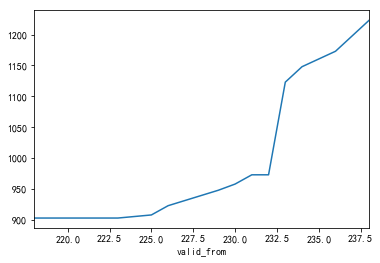

(0, 0, 9)


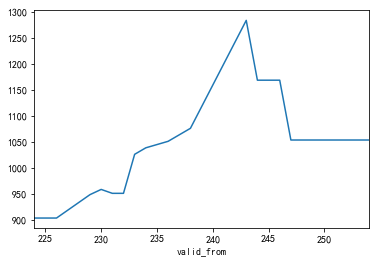

(0, 1, 8)


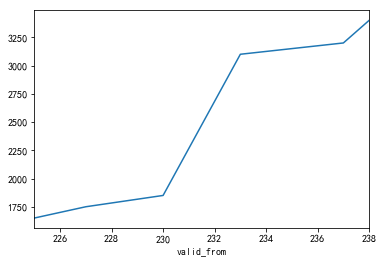

(0, 1, 9)


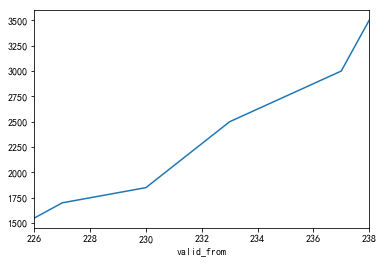

(0, 2, 9)


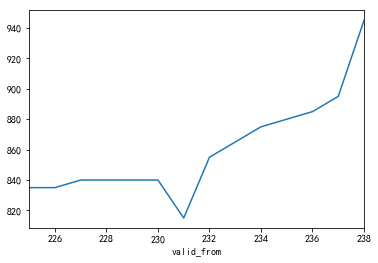

(0, 3, 9)


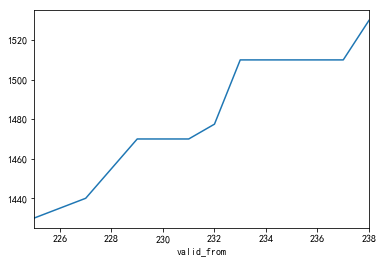

(0, 4, 9)


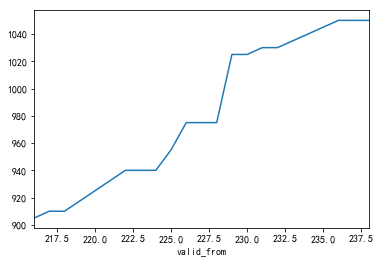

(0, 5, 9)


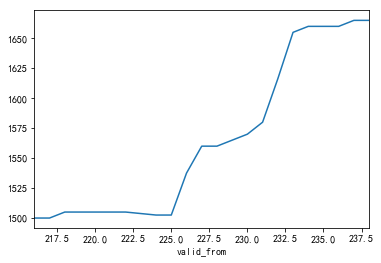

(0, 6, 9)


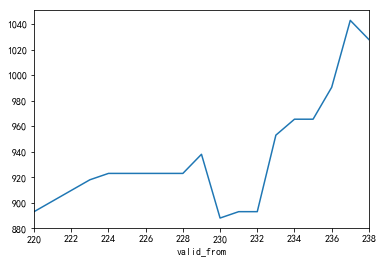

(0, 7, 8)


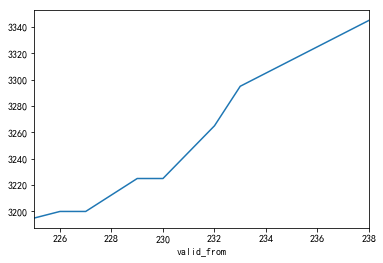

(0, 7, 9)


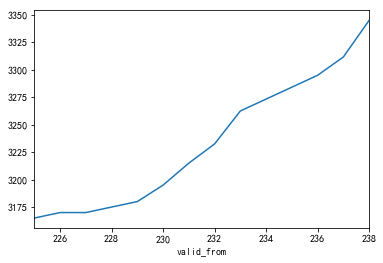

(0, 8, 8)


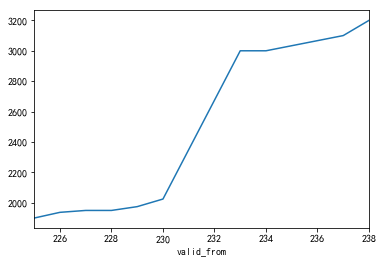

(0, 8, 9)


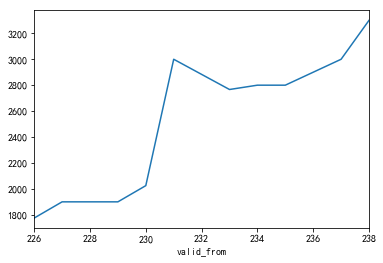

(0, 9, 8)


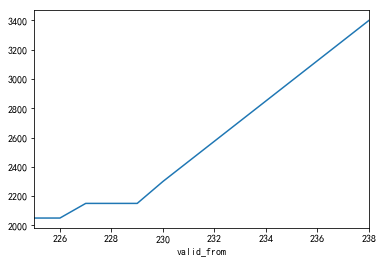

(0, 9, 9)


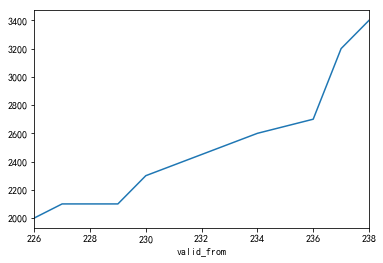

(0, 10, 8)


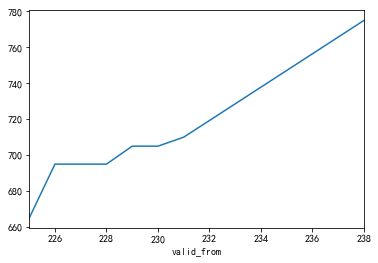

(0, 10, 9)


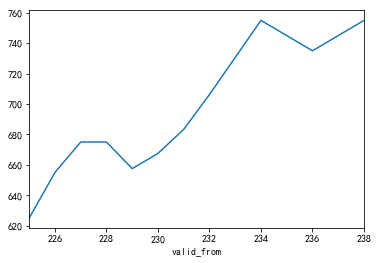

(0, 11, 8)


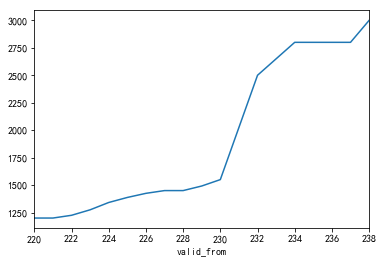

(0, 11, 9)


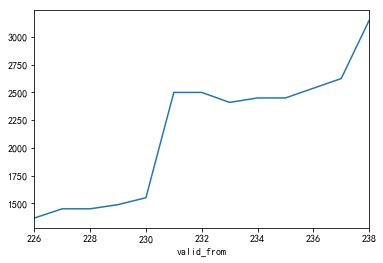

(0, 12, 9)


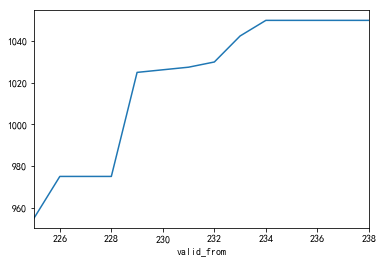

(0, 13, 9)


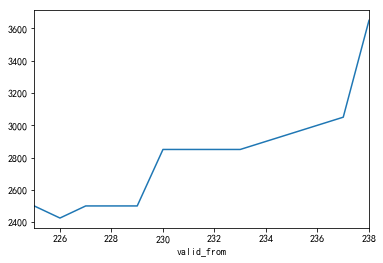

(0, 14, 9)


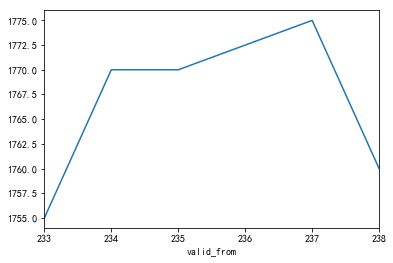

(0, 15, 8)


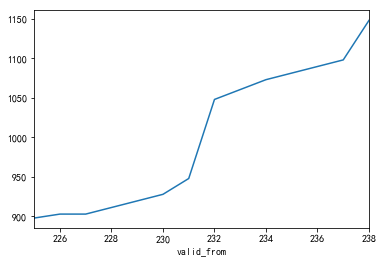

(0, 15, 9)


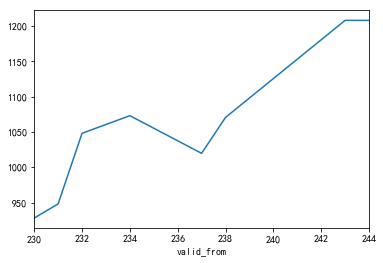

(0, 16, 9)


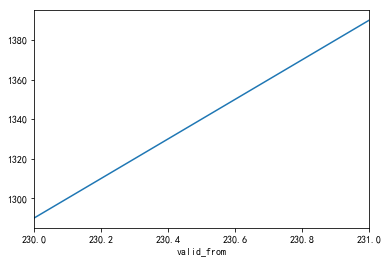

(0, 17, 8)


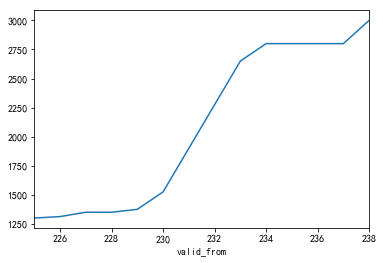

(0, 17, 9)


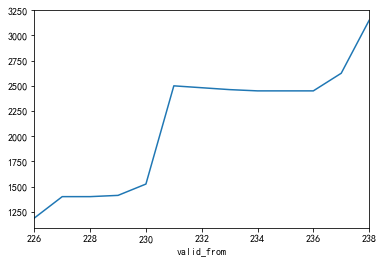

(0, 18, 8)


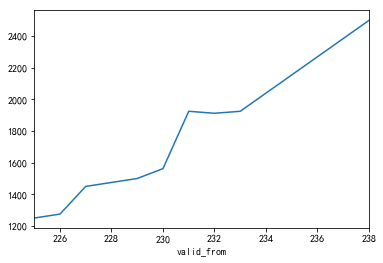

(0, 18, 9)


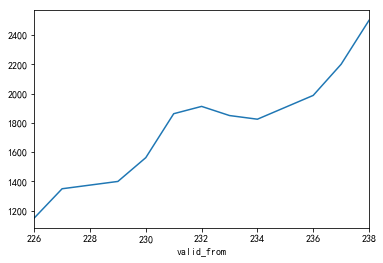

(0, 19, 8)


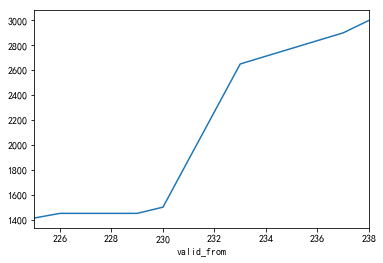

(0, 19, 9)


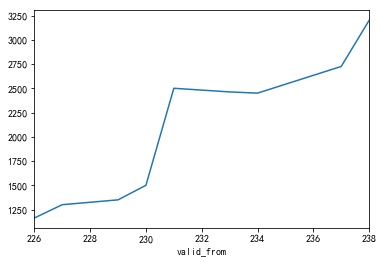

(0, 20, 8)


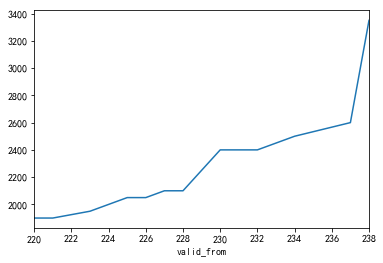

(0, 20, 9)


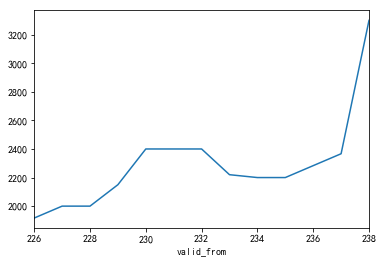

(0, 21, 9)


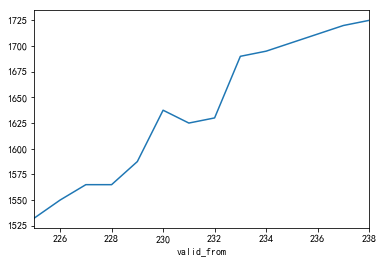

(0, 22, 9)


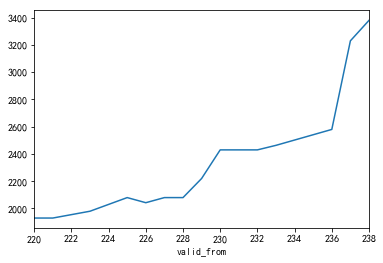

(0, 23, 9)


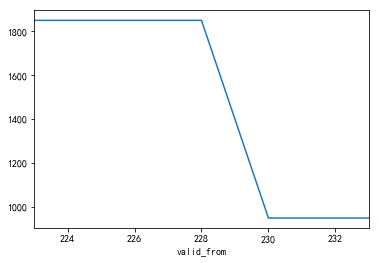

(0, 24, 9)


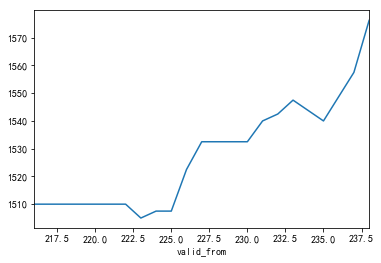

(0, 25, 8)


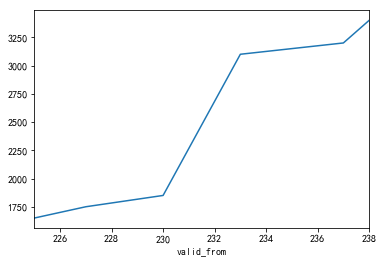

(0, 25, 9)


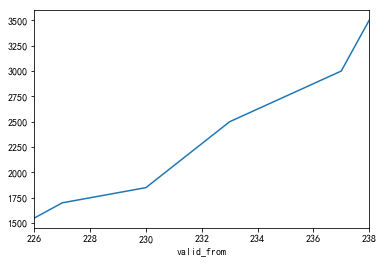

(0, 26, 9)


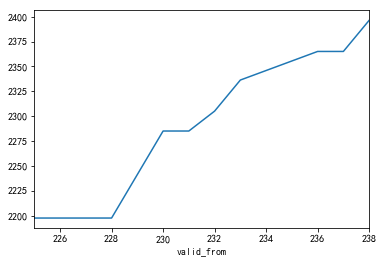

(0, 27, 9)


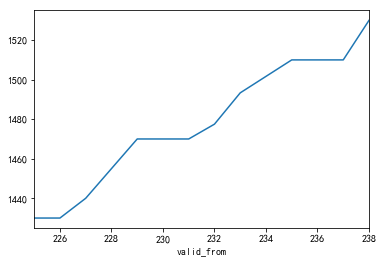

(0, 28, 9)


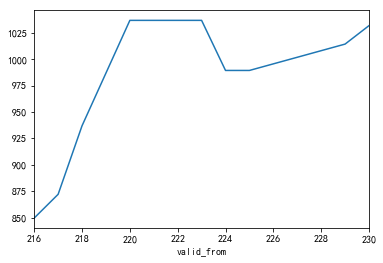

(0, 29, 8)


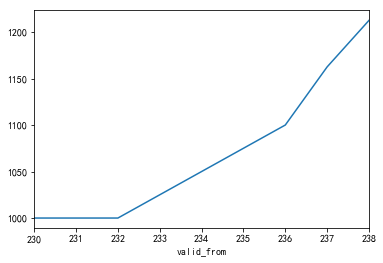

(0, 29, 9)


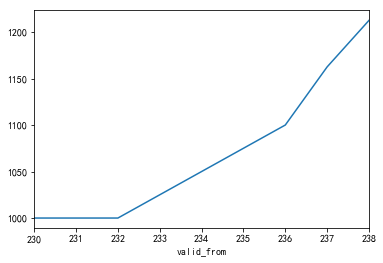

(0, 30, 9)


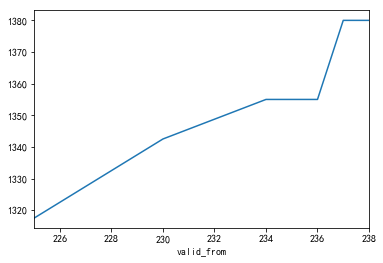

(0, 31, 8)


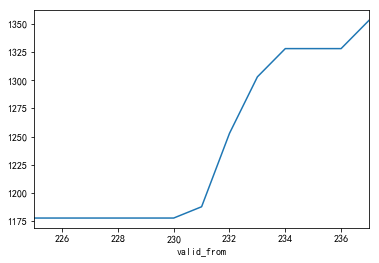

(0, 31, 9)


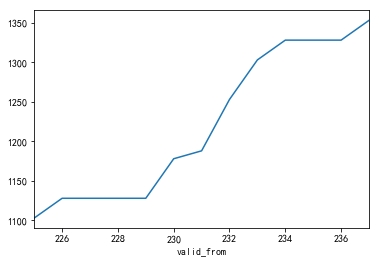

(0, 32, 9)


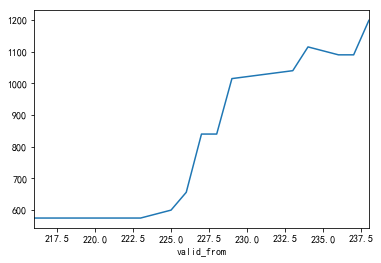

(0, 33, 9)


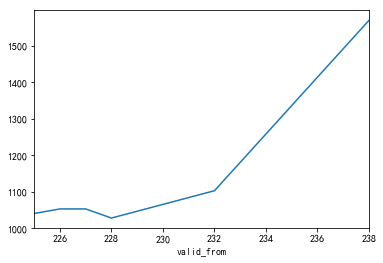

(0, 34, 8)


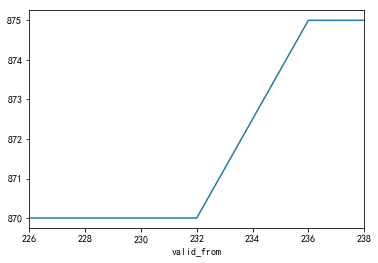

(0, 34, 9)


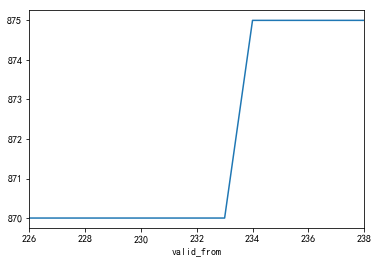

(0, 35, 9)


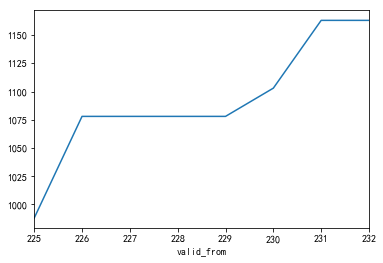

(0, 36, 9)


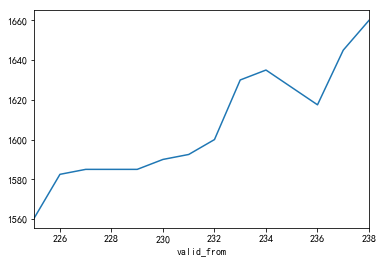

(0, 37, 8)


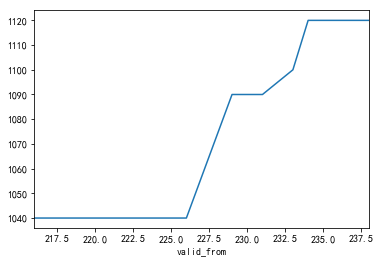

(0, 37, 9)


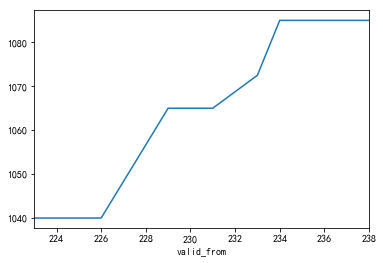

(0, 39, 8)


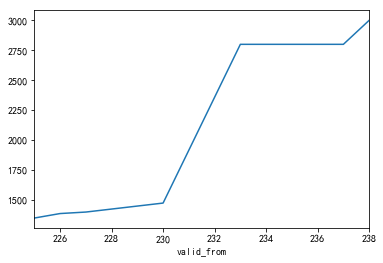

(0, 39, 9)


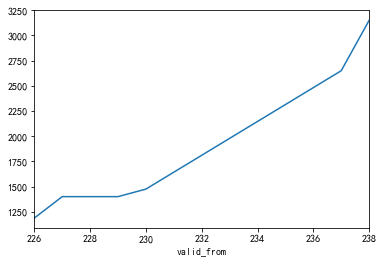

(0, 40, 9)


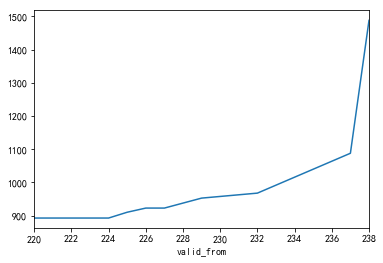

(0, 41, 8)


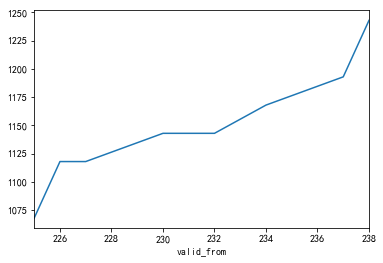

(0, 41, 9)


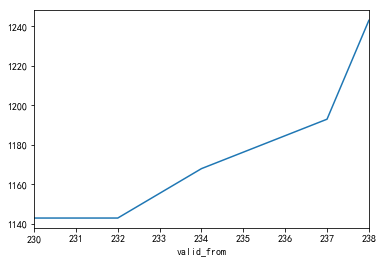

(0, 42, 9)


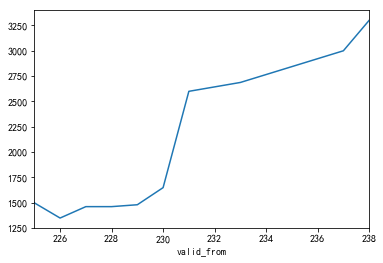

(0, 43, 8)


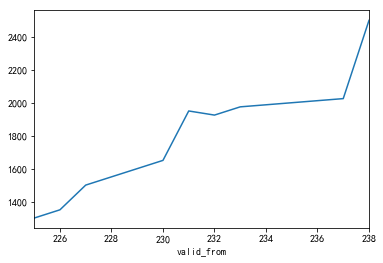

(0, 43, 9)


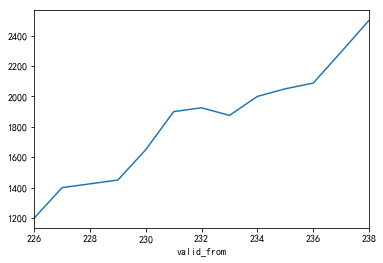

(0, 44, 8)


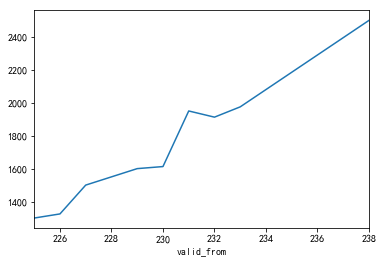

(0, 44, 9)


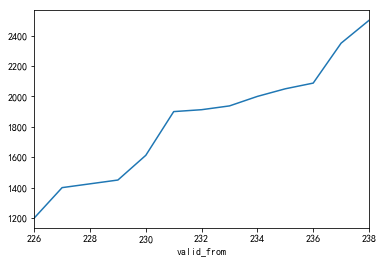

(0, 45, 8)


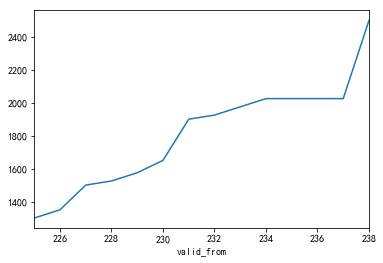

(0, 45, 9)


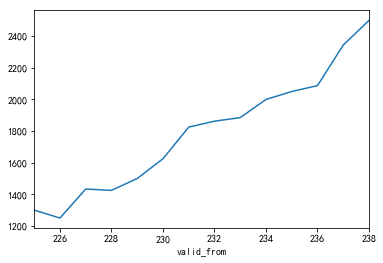

(0, 46, 9)


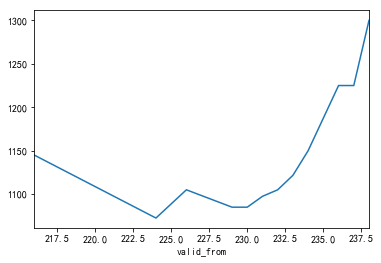

(0, 47, 9)


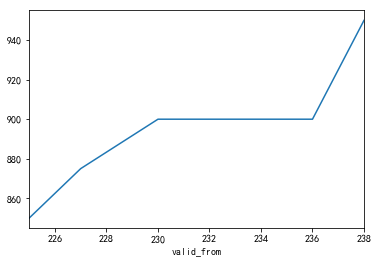

(0, 48, 8)


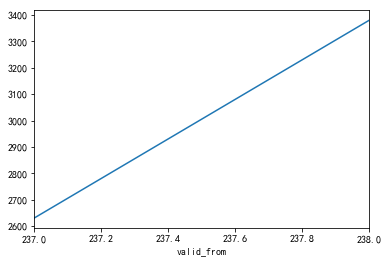

(0, 48, 9)


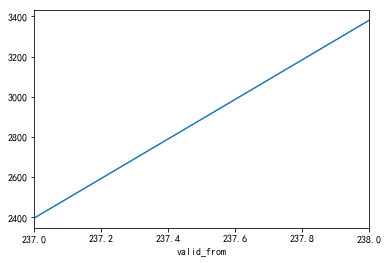

(0, 49, 8)


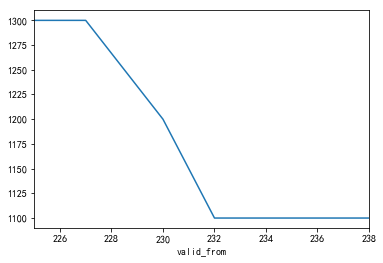

(0, 49, 9)


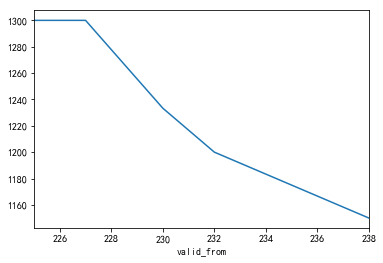

(0, 50, 8)


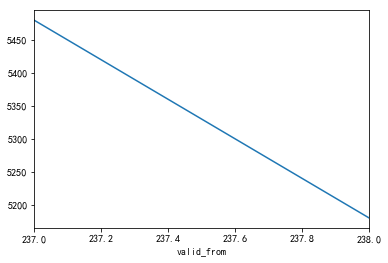

(0, 50, 9)


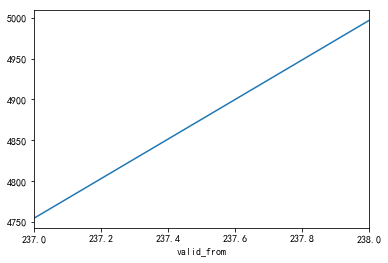

(0, 51, 8)


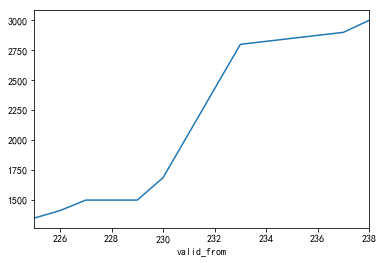

(0, 51, 9)


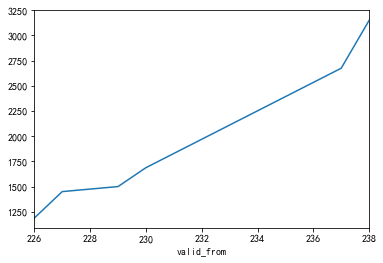

(0, 52, 9)


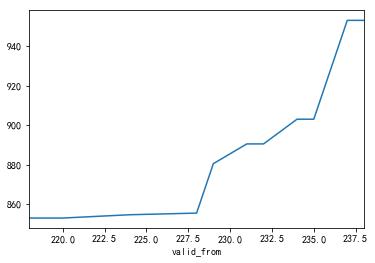

(0, 53, 9)


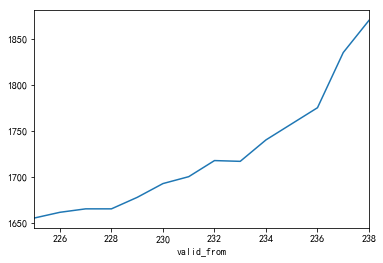

(0, 54, 8)


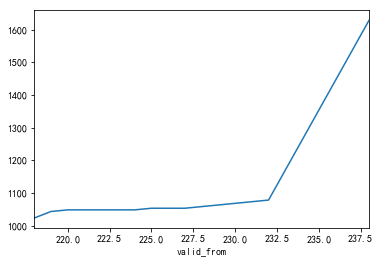

(0, 54, 9)


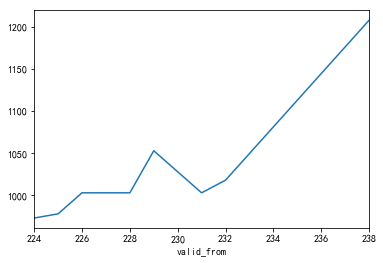

(0, 55, 8)


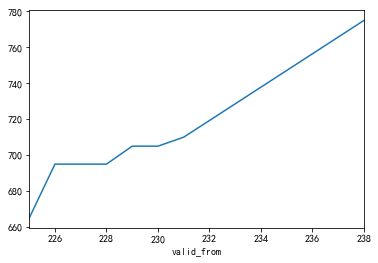

(0, 55, 9)


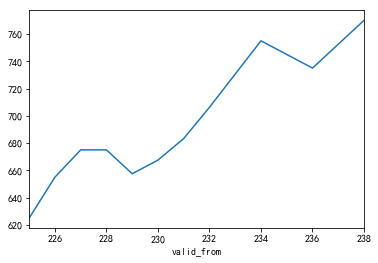

(0, 56, 8)


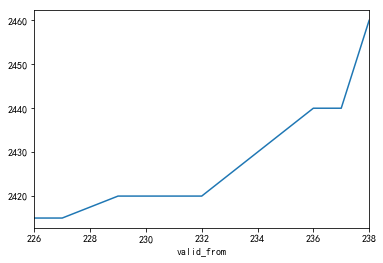

(0, 56, 9)


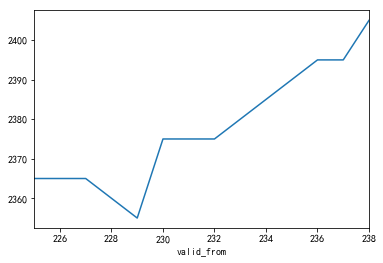

(0, 57, 8)


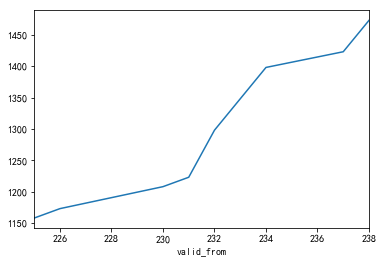

(0, 57, 9)


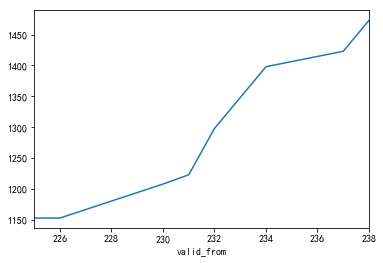

(0, 58, 9)


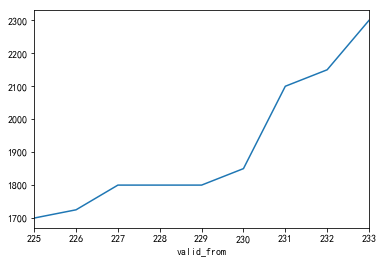

(0, 59, 8)


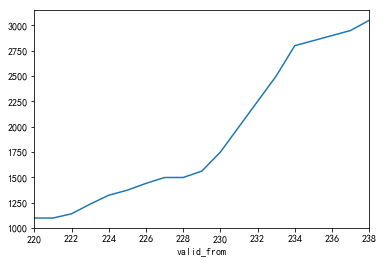

(0, 59, 9)


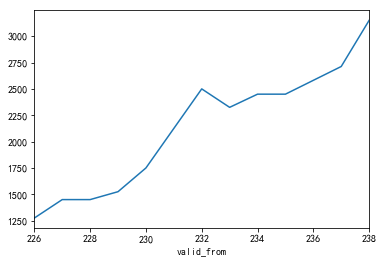

(0, 60, 9)


C:\Users\FJ\Anaconda3\lib\site-packages\matplotlib\axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


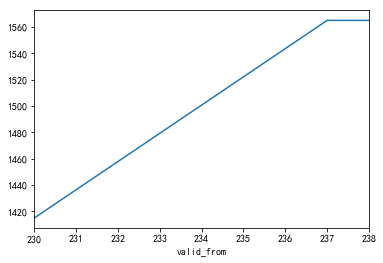

(0, 61, 9)


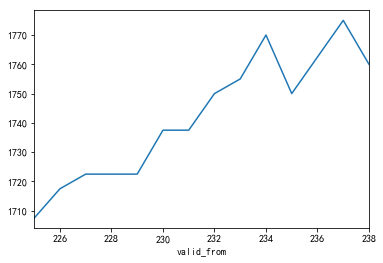

(0, 62, 8)


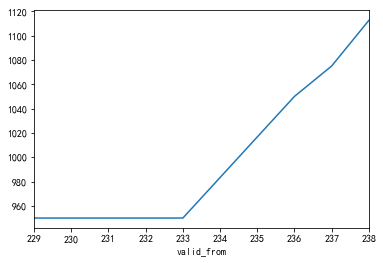

(0, 62, 9)


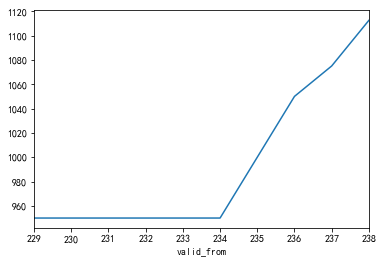

(0, 63, 8)


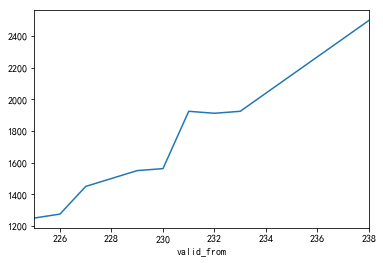

(0, 63, 9)


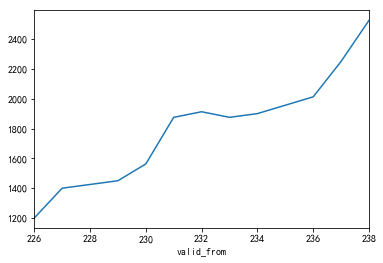

(0, 64, 9)


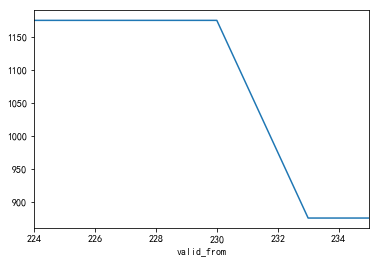

(0, 65, 8)


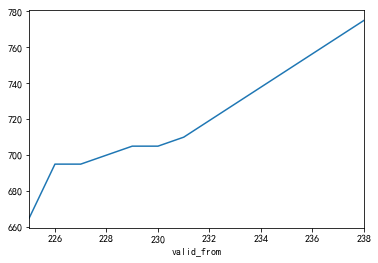

(0, 65, 9)


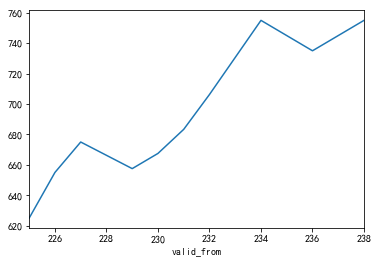

(0, 66, 8)


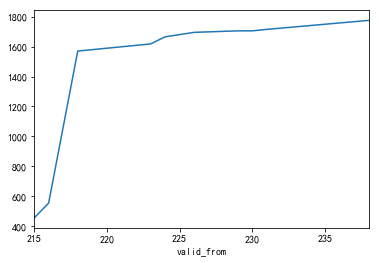

(0, 66, 9)


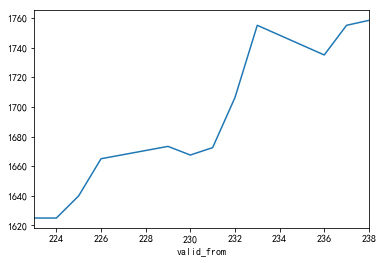

(0, 67, 9)


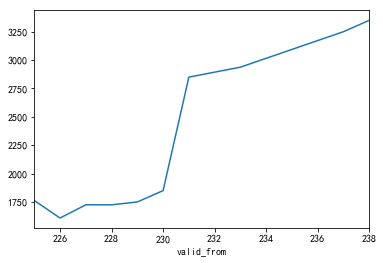

(0, 68, 8)


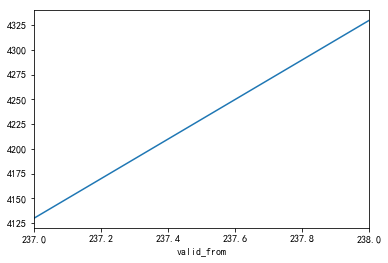

(0, 68, 9)


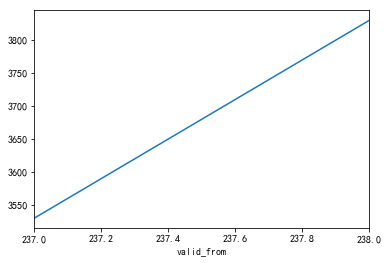

(0, 69, 8)


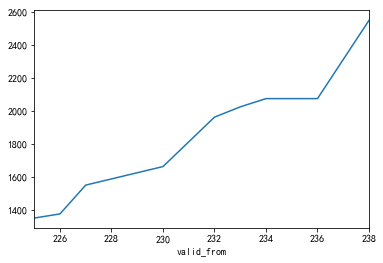

(0, 69, 9)


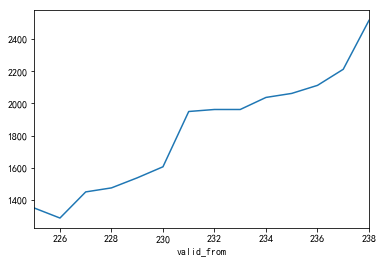

(0, 70, 8)


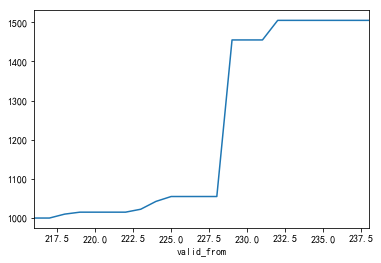

(0, 70, 9)


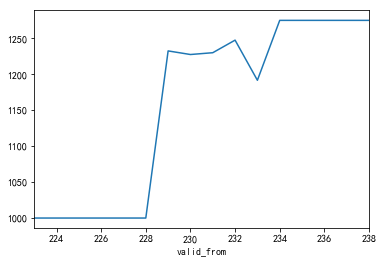

(0, 71, 9)


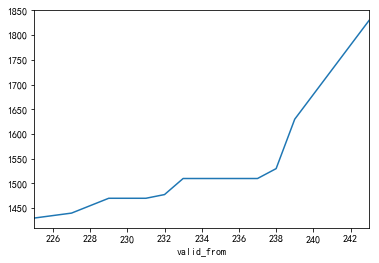

(0, 72, 8)


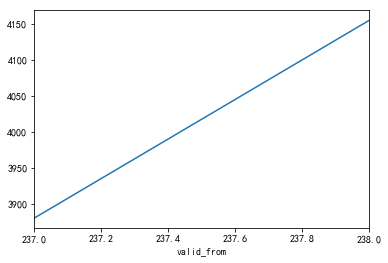

(0, 72, 9)


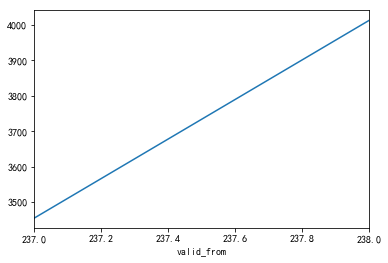

(0, 73, 9)


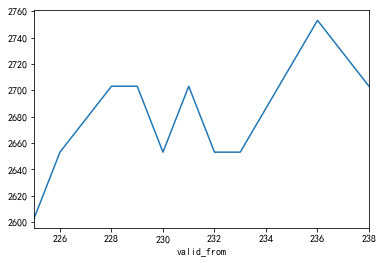

(0, 74, 8)


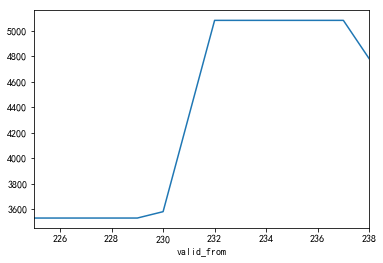

(0, 74, 9)


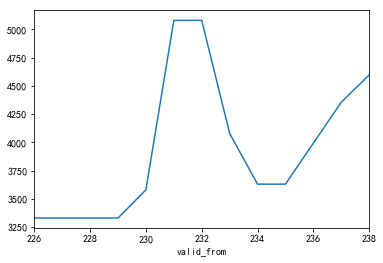

(0, 75, 8)


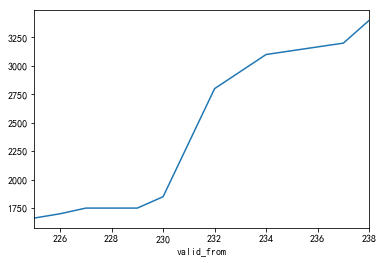

(0, 75, 9)


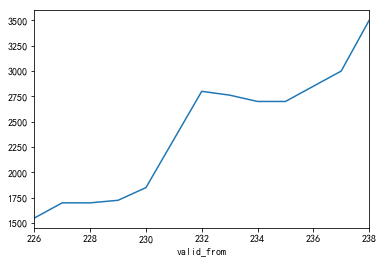

(0, 76, 8)


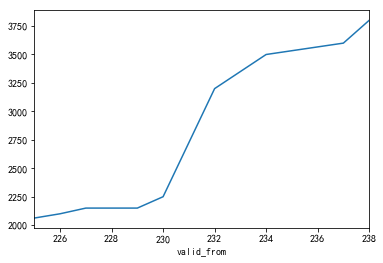

(0, 76, 9)


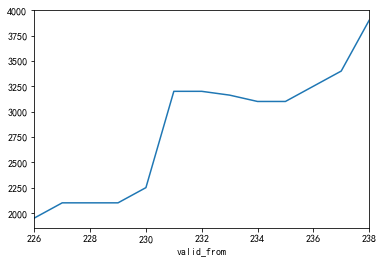

(0, 77, 8)


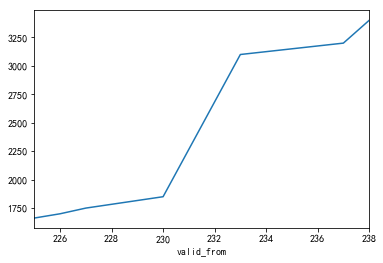

(0, 77, 9)


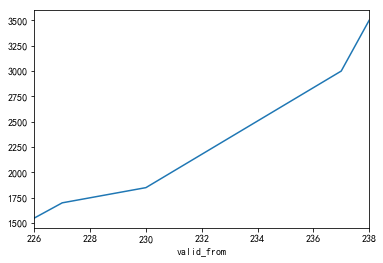

(0, 78, 9)


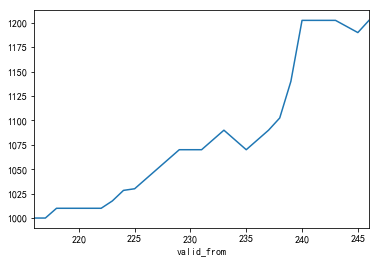

(0, 79, 9)


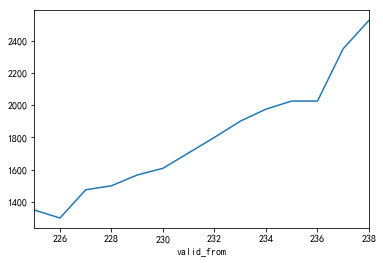

(0, 80, 8)


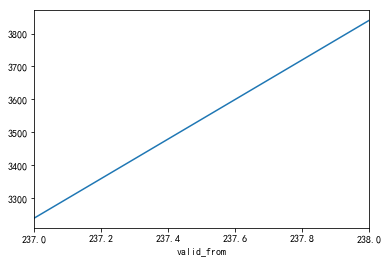

(0, 80, 9)


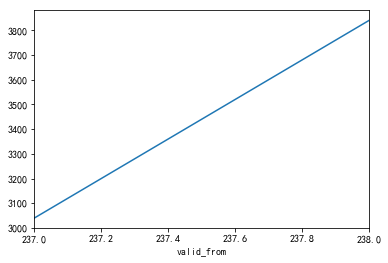

(0, 81, 8)


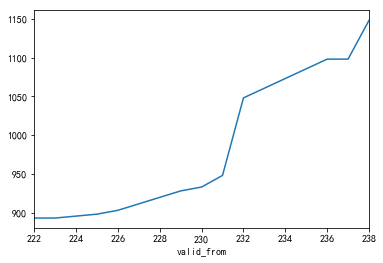

(0, 81, 9)


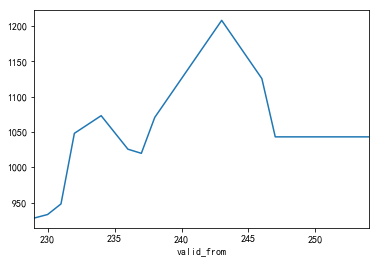

(0, 82, 8)


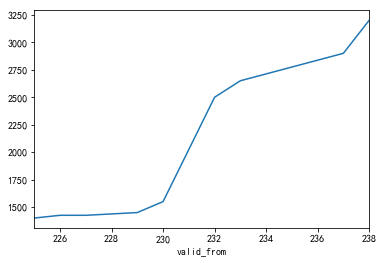

(0, 82, 9)


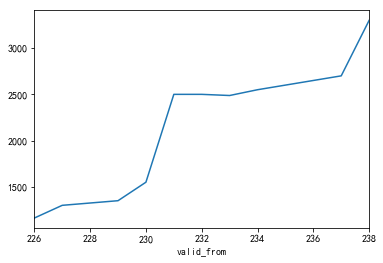

(0, 83, 9)


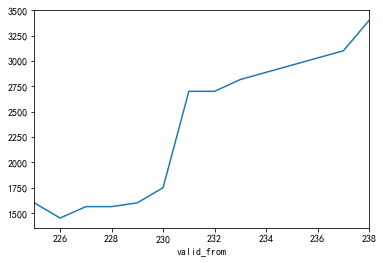

(0, 85, 8)


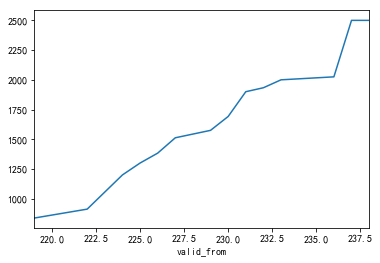

(0, 85, 9)


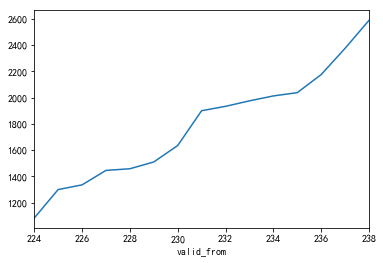

(0, 86, 8)


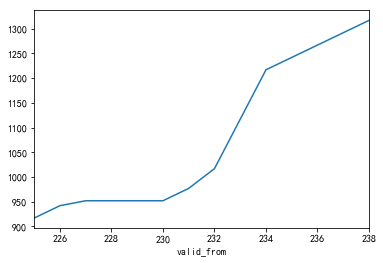

(0, 86, 9)


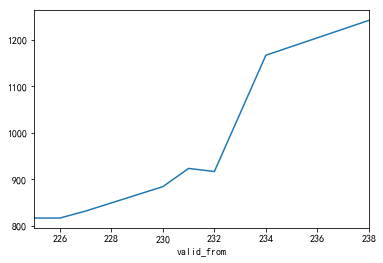

(0, 87, 8)


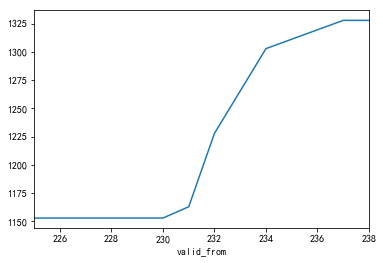

(0, 87, 9)


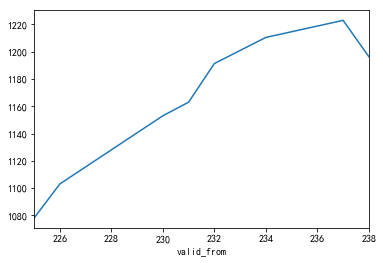

(0, 88, 9)


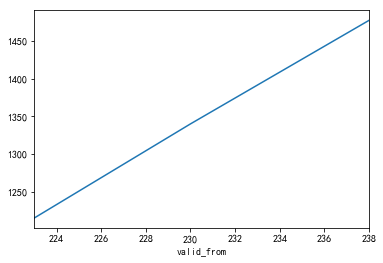

(0, 89, 9)


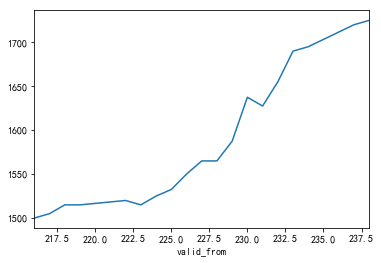

(0, 90, 8)


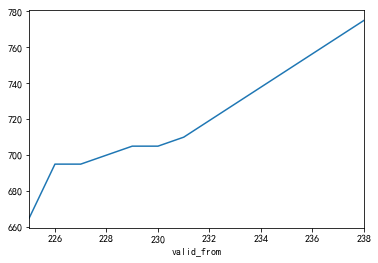

(0, 90, 9)


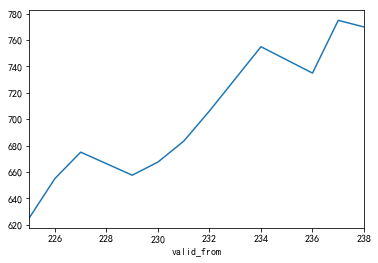

(0, 91, 8)


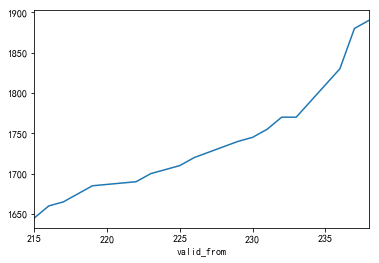

(0, 91, 9)


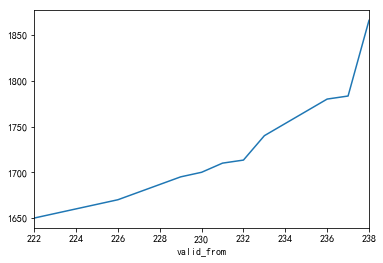

(0, 92, 9)


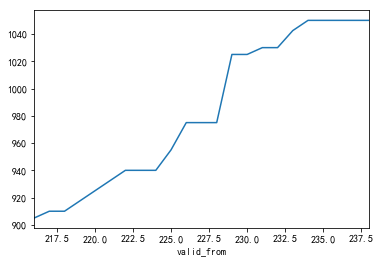

(0, 93, 9)


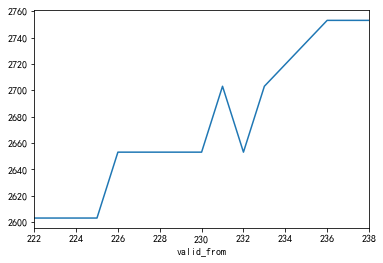

(0, 94, 8)


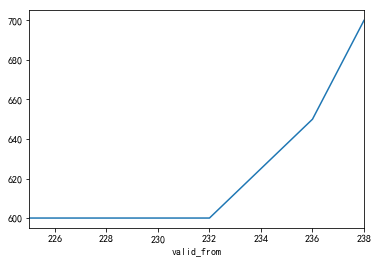

(0, 94, 9)


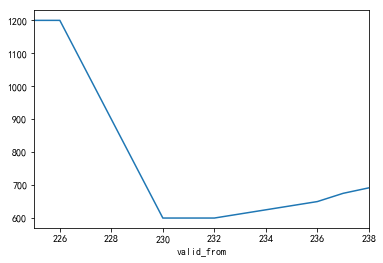

(0, 95, 8)


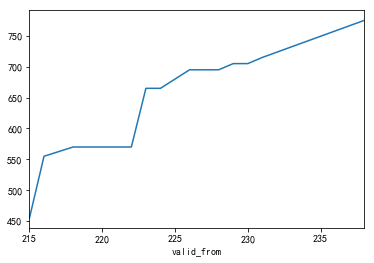

(0, 95, 9)


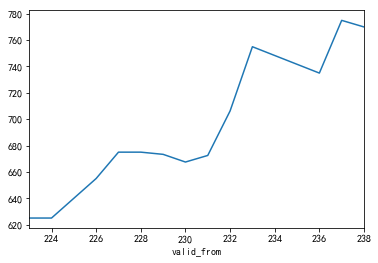

(0, 96, 9)


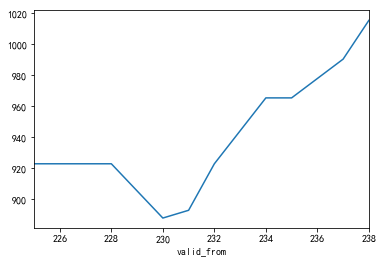

(1, 0, 8)


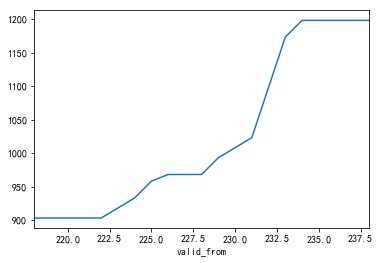

(1, 0, 9)


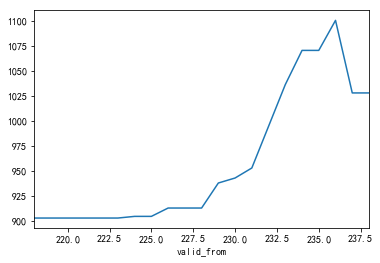

(1, 1, 9)


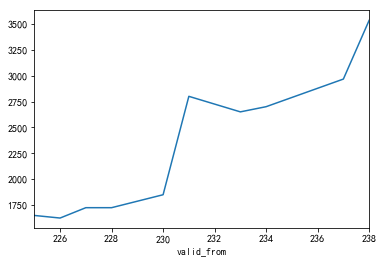

(1, 2, 8)


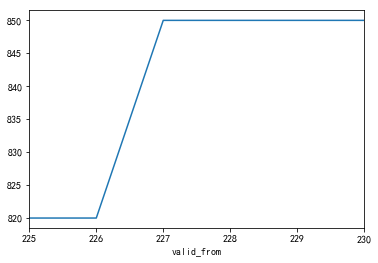

(1, 2, 9)


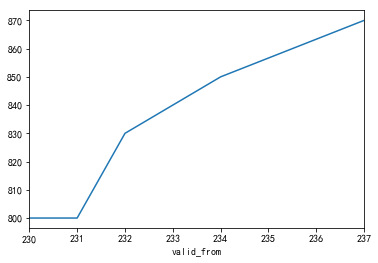

(1, 3, 9)


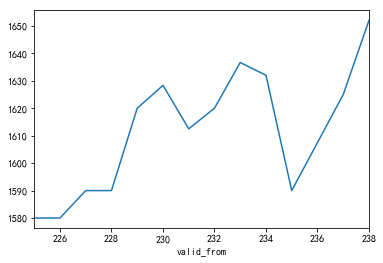

(1, 4, 8)


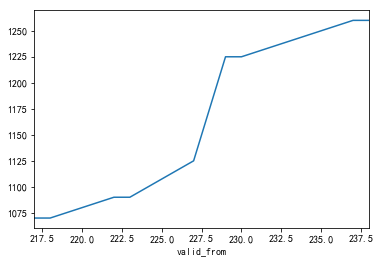

(1, 4, 9)


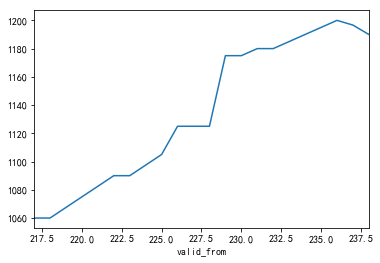

(1, 5, 8)


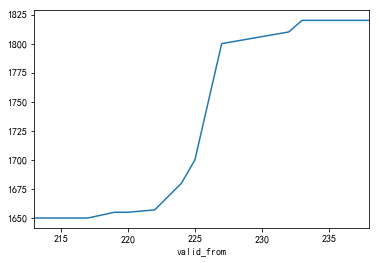

(1, 5, 9)


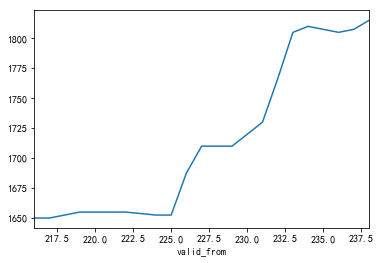

(1, 6, 8)


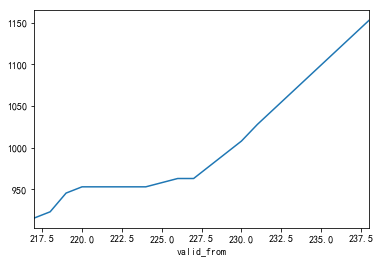

(1, 6, 9)


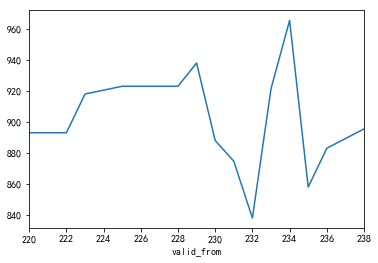

(1, 7, 9)


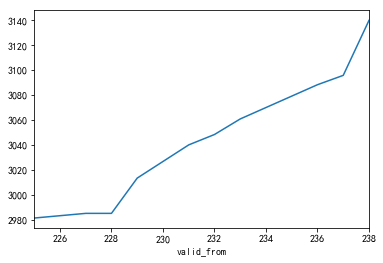

(1, 8, 8)


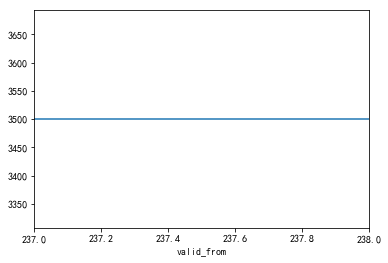

(1, 8, 9)


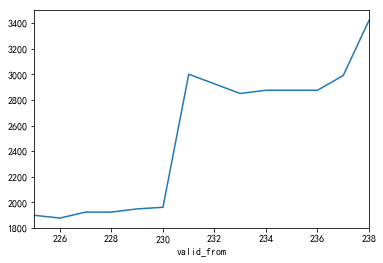

(1, 9, 9)


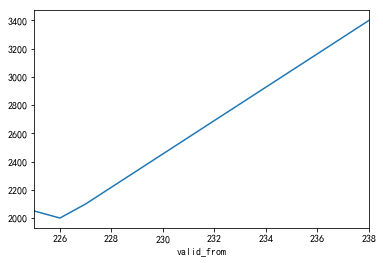

(1, 10, 8)


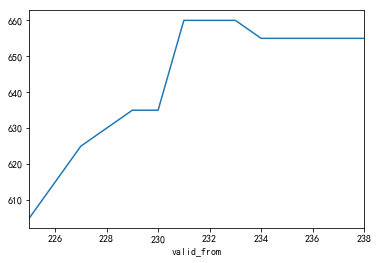

(1, 10, 9)


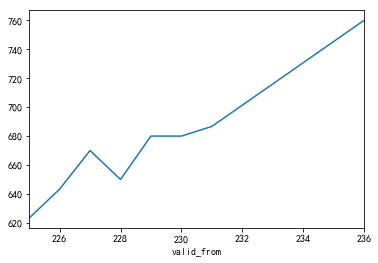

(1, 11, 9)


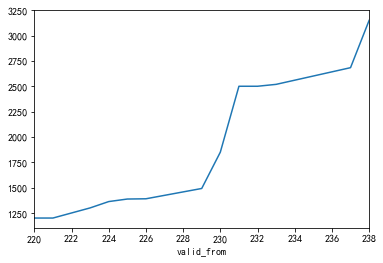

(1, 12, 8)


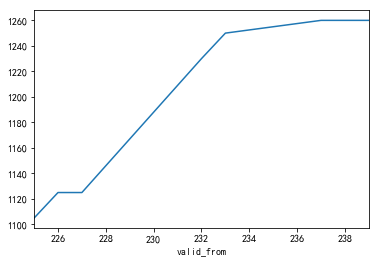

(1, 12, 9)


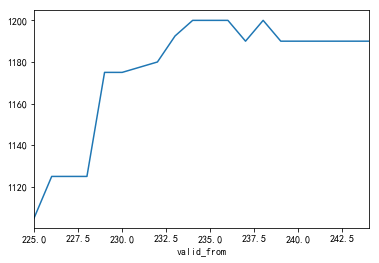

(1, 13, 9)


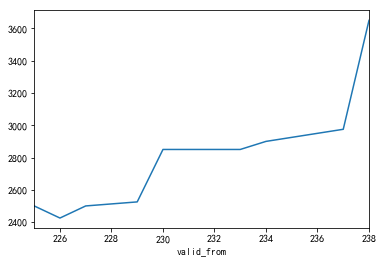

(1, 14, 9)


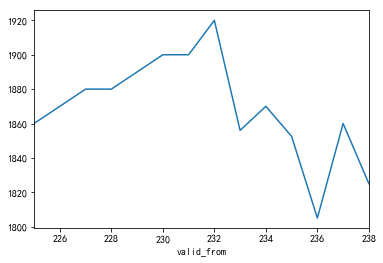

(1, 15, 9)


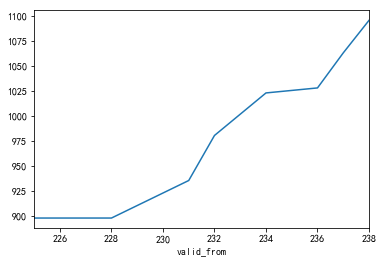

(1, 16, 8)


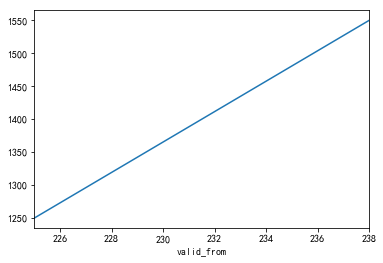

(1, 17, 9)


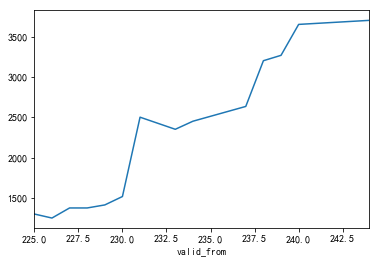

(1, 18, 9)


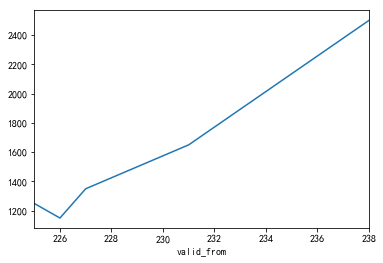

(1, 19, 9)


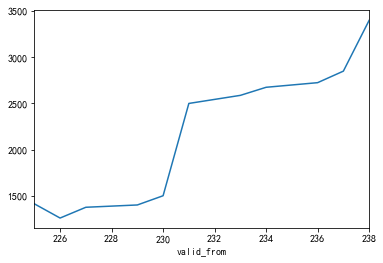

(1, 20, 9)


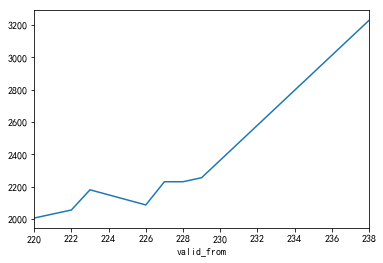

(1, 21, 8)


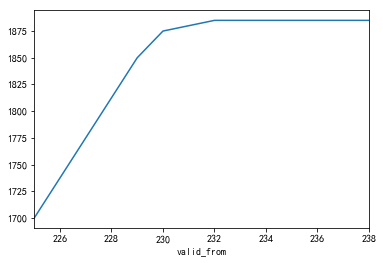

(1, 21, 9)


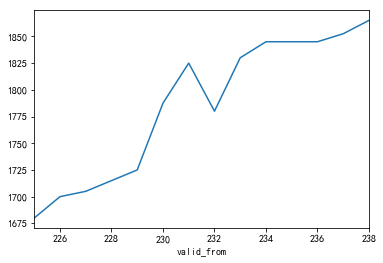

(1, 22, 9)


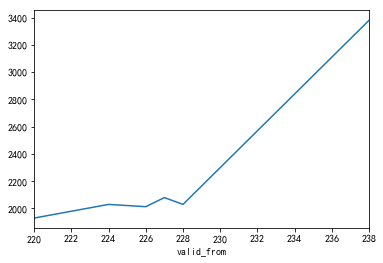

(1, 23, 8)


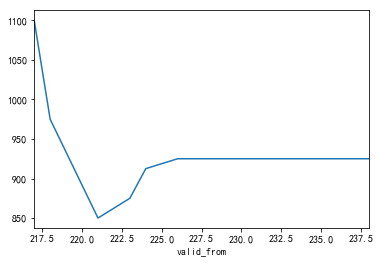

(1, 23, 9)


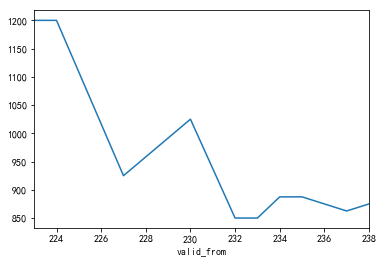

(1, 24, 9)


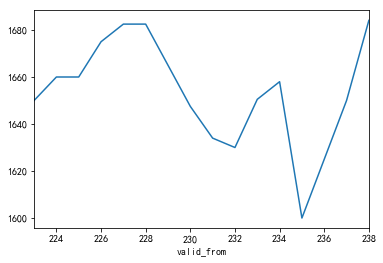

(1, 25, 9)


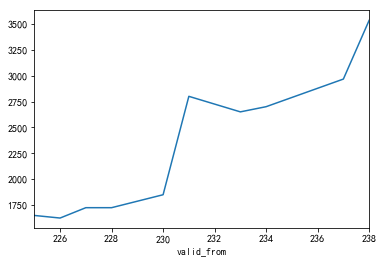

(1, 26, 9)


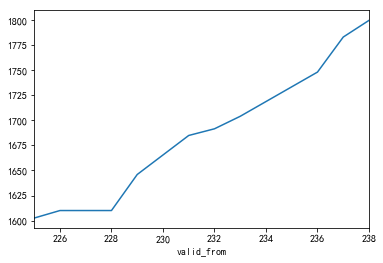

(1, 27, 9)


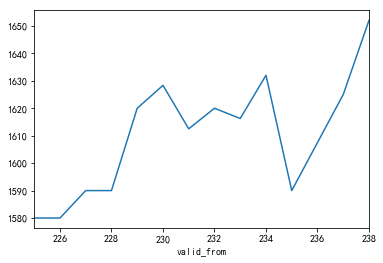

(1, 28, 8)


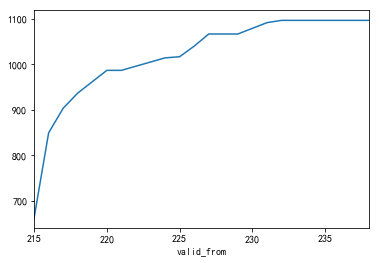

(1, 28, 9)


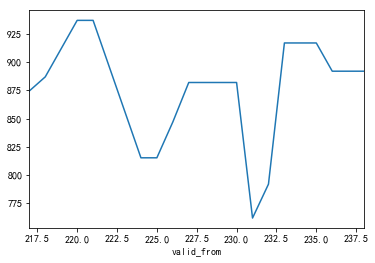

(1, 29, 8)


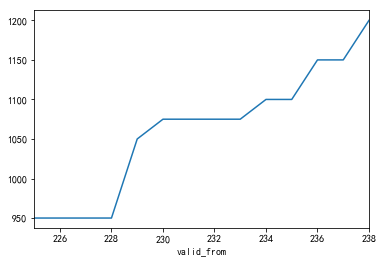

(1, 29, 9)


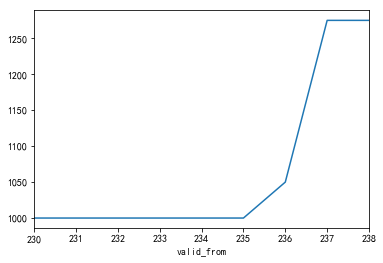

(1, 30, 9)


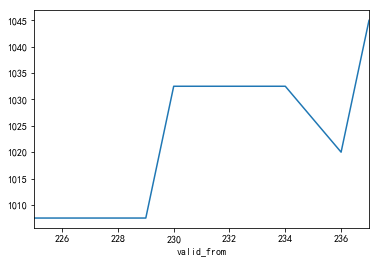

(1, 31, 8)


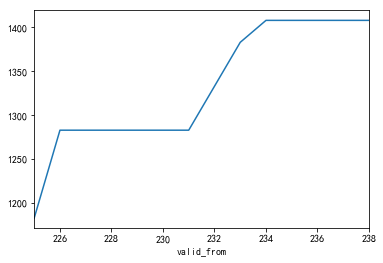

(1, 31, 9)


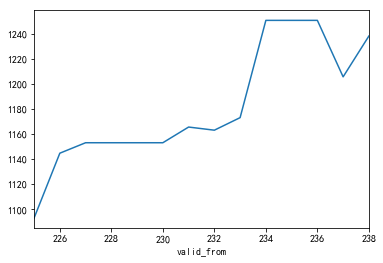

(1, 32, 8)


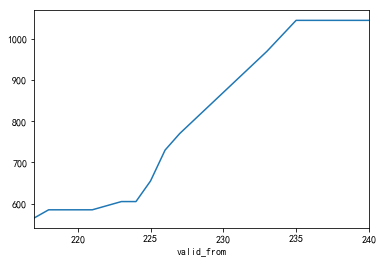

(1, 32, 9)


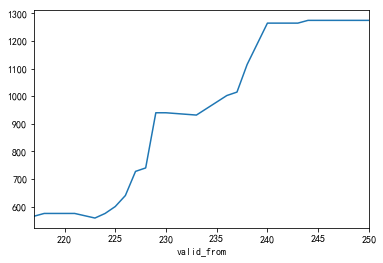

(1, 33, 8)


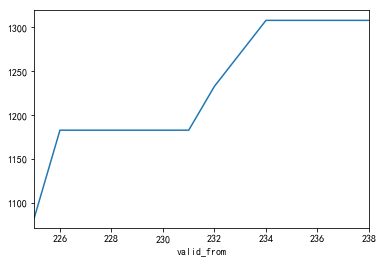

(1, 33, 9)


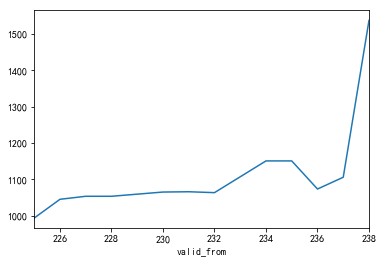

(1, 34, 8)


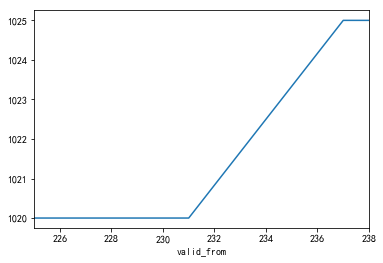

(1, 34, 9)


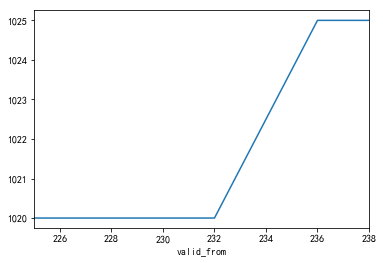

(1, 35, 9)


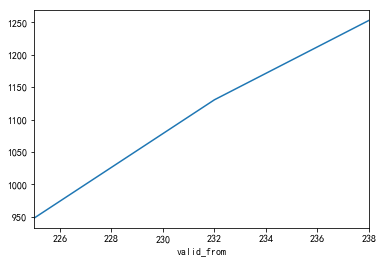

(1, 36, 9)


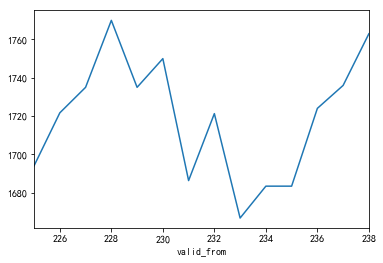

(1, 37, 9)


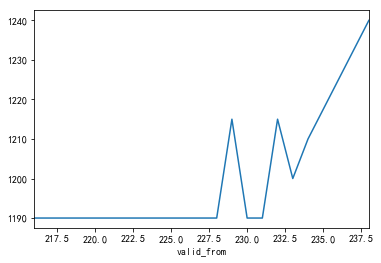

(1, 38, 9)


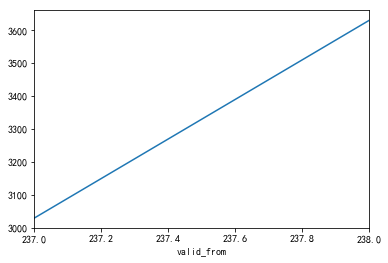

(1, 39, 9)


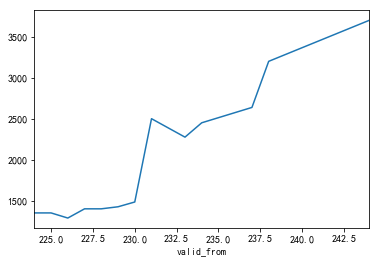

(1, 40, 9)


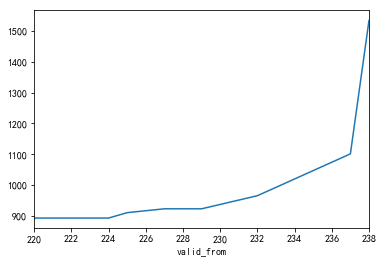

(1, 41, 9)


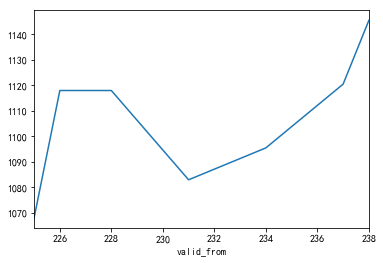

(1, 42, 9)


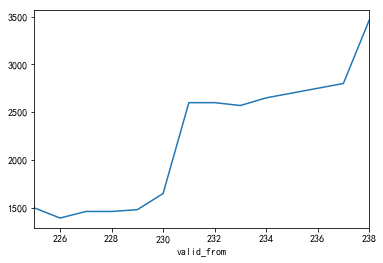

(1, 43, 9)


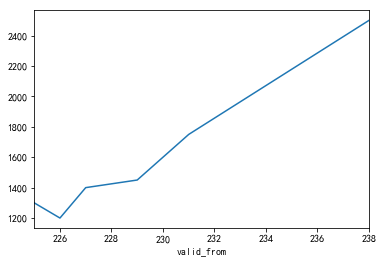

(1, 44, 9)


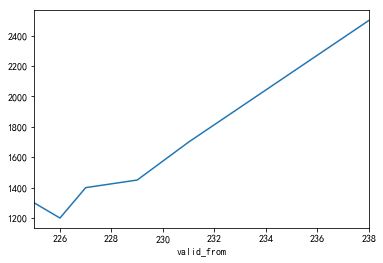

(1, 45, 9)


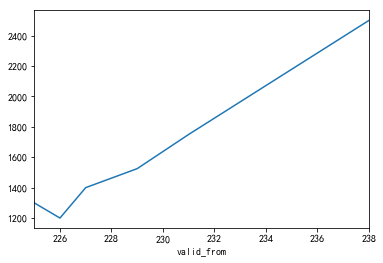

(1, 46, 8)


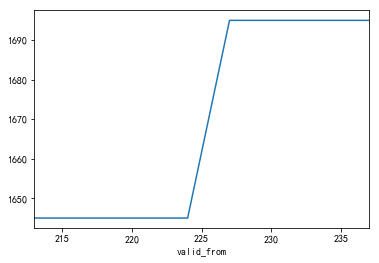

(1, 46, 9)


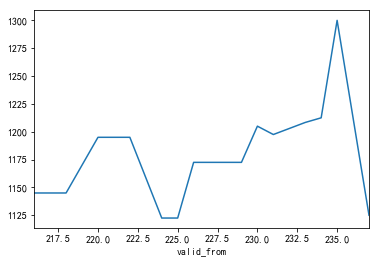

(1, 47, 9)


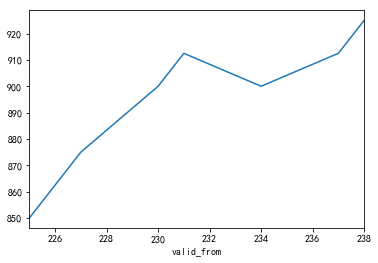

(1, 48, 9)


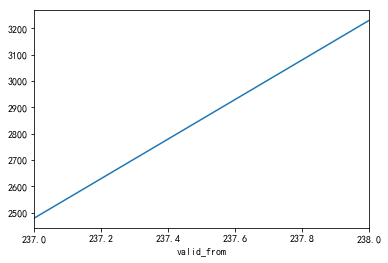

(1, 49, 8)


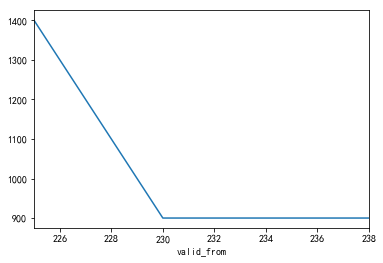

(1, 49, 9)


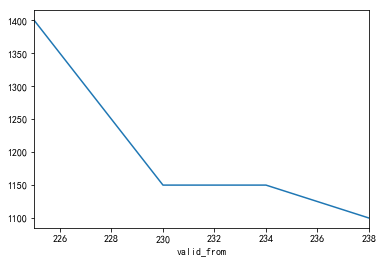

(1, 50, 9)


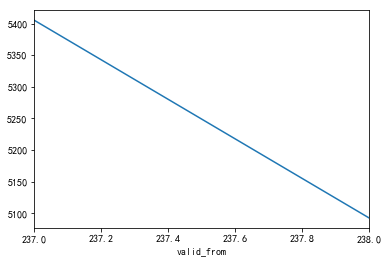

(1, 51, 9)


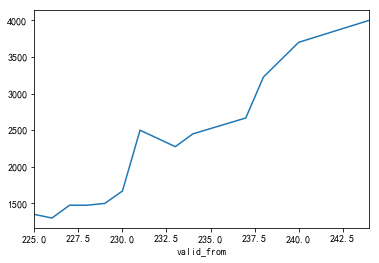

(1, 52, 8)


C:\Users\FJ\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=230.0, right=230.0
  ax.set_xlim(left, right)


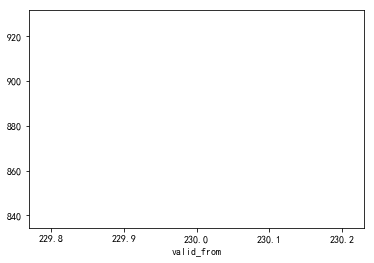

(1, 52, 9)


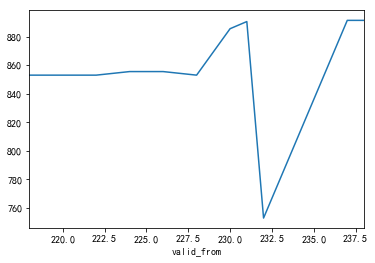

(1, 53, 8)


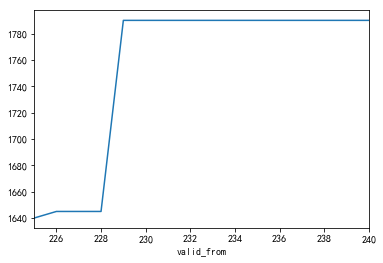

(1, 53, 9)


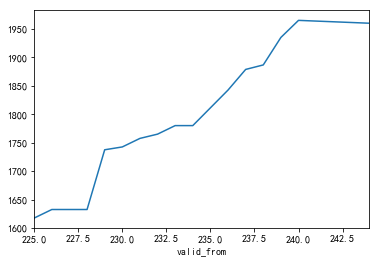

(1, 54, 8)


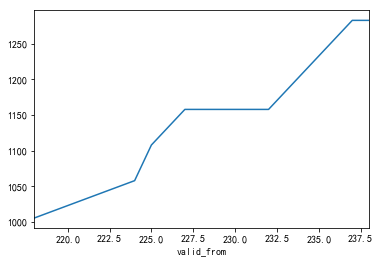

(1, 54, 9)


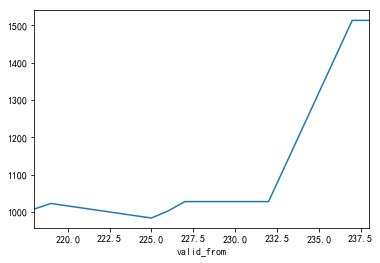

(1, 55, 8)


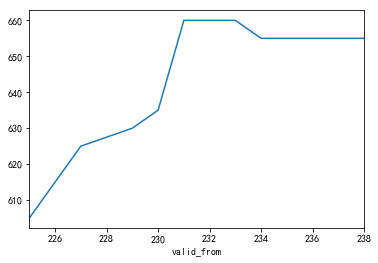

(1, 55, 9)


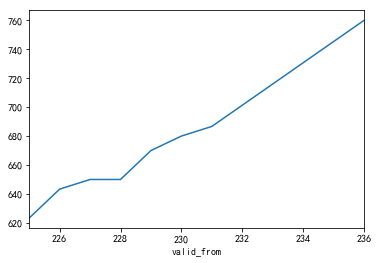

(1, 57, 9)


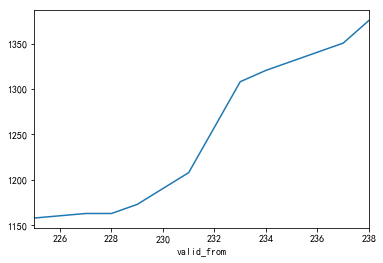

(1, 58, 8)


C:\Users\FJ\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=238.0, right=238.0
  ax.set_xlim(left, right)


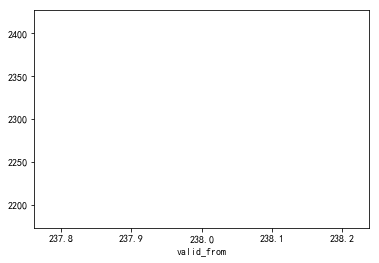

(1, 58, 9)


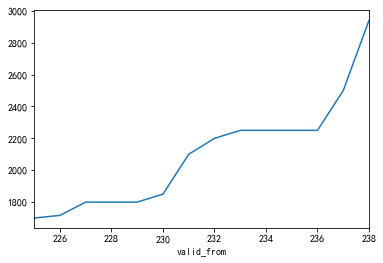

(1, 59, 9)


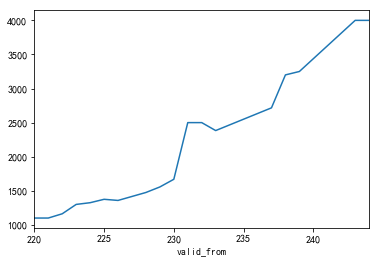

(1, 60, 8)


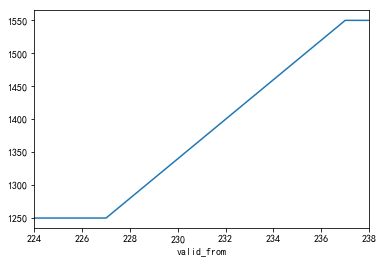

(1, 61, 9)


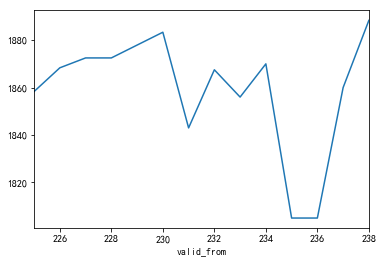

(1, 62, 8)


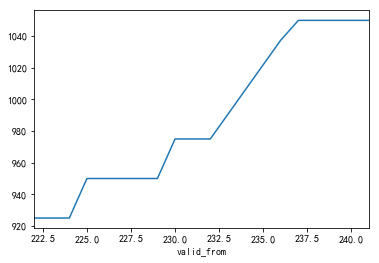

(1, 62, 9)


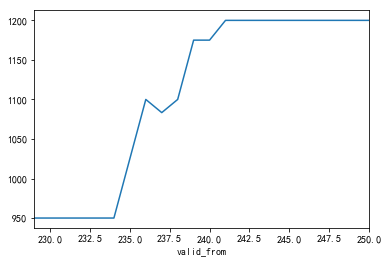

(1, 63, 9)


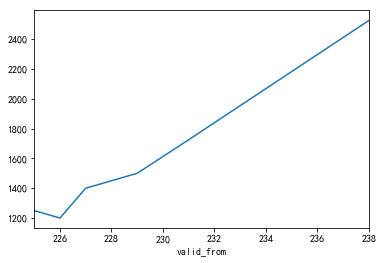

(1, 64, 9)


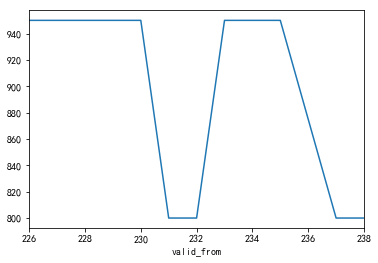

(1, 65, 8)


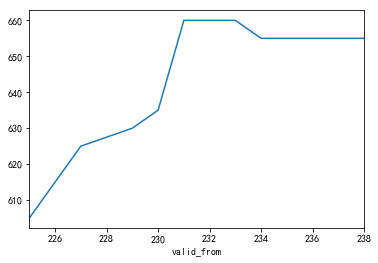

(1, 65, 9)


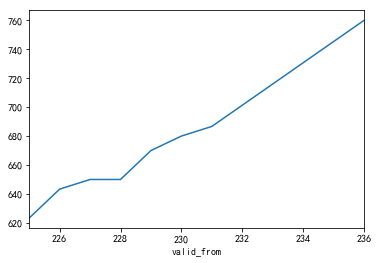

(1, 69, 9)


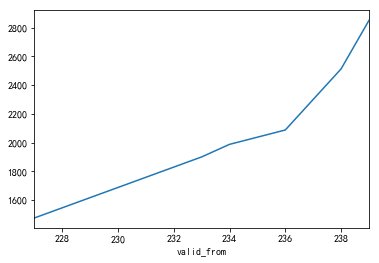

(1, 70, 8)


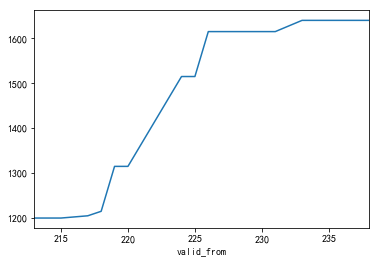

(1, 70, 9)


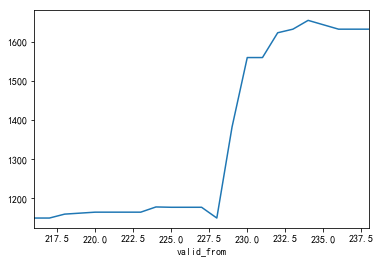

(1, 71, 9)


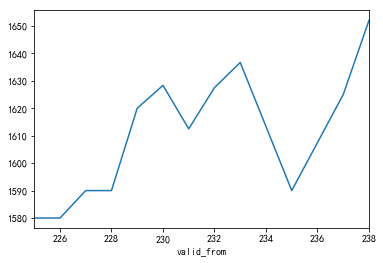

(1, 72, 9)


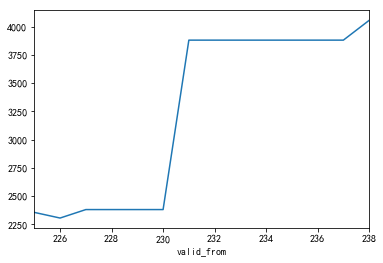

(1, 73, 9)


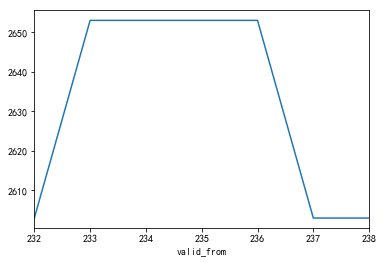

(1, 74, 9)


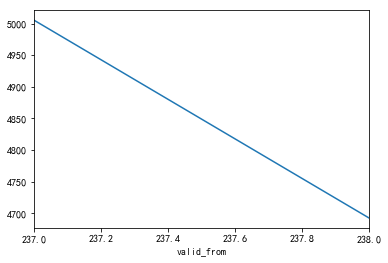

(1, 75, 8)


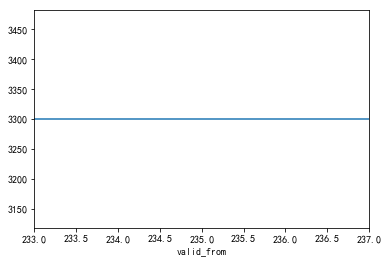

(1, 75, 9)


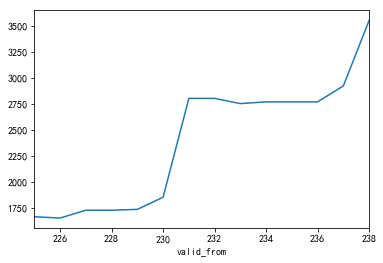

(1, 76, 9)


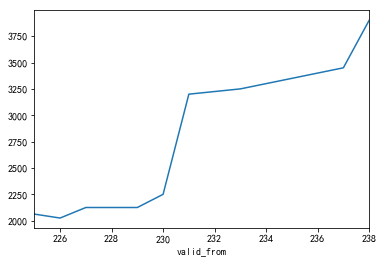

(1, 77, 9)


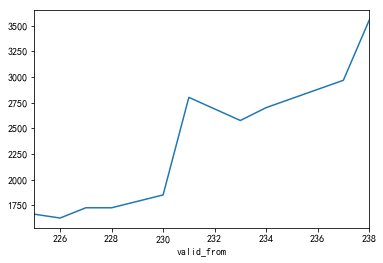

(1, 78, 9)


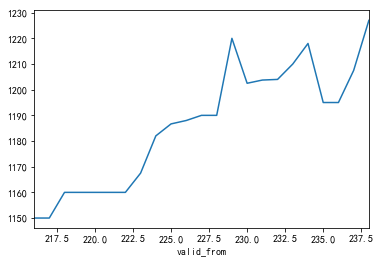

(1, 79, 9)


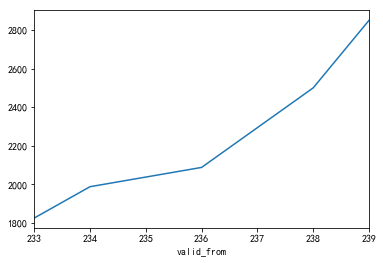

(1, 81, 8)


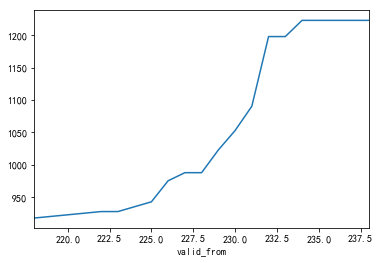

(1, 81, 9)


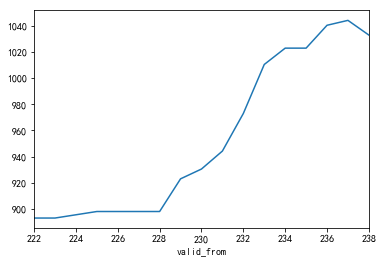

(1, 82, 9)


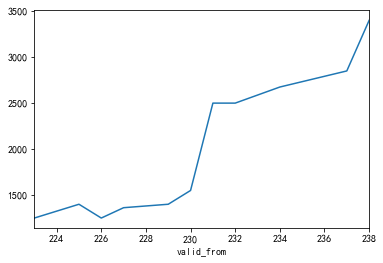

(1, 83, 9)


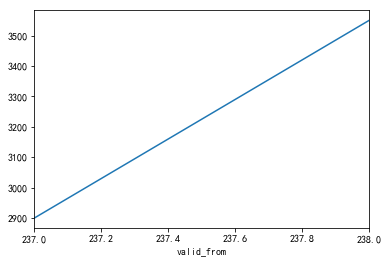

(1, 84, 9)


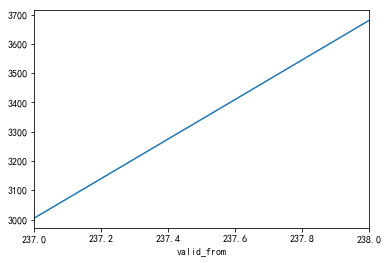

(1, 85, 9)


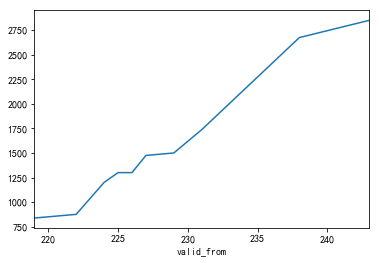

(1, 86, 8)


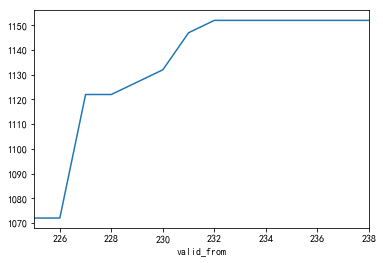

(1, 86, 9)


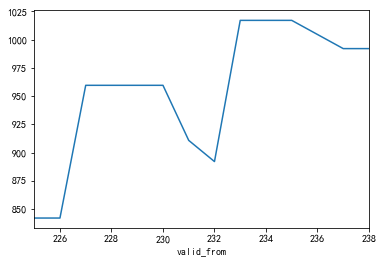

(1, 87, 8)


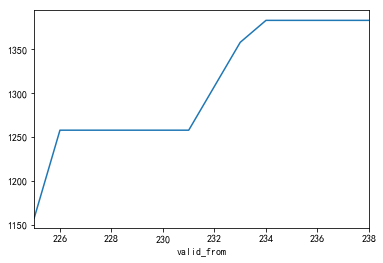

(1, 87, 9)


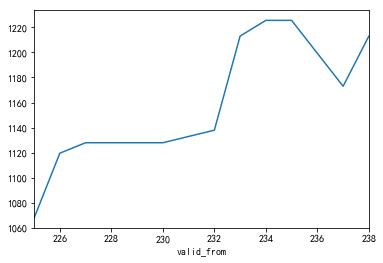

(1, 88, 8)


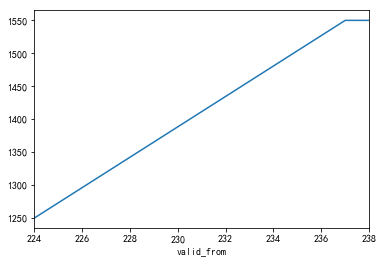

(1, 89, 8)


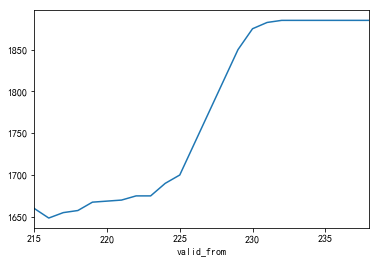

(1, 89, 9)


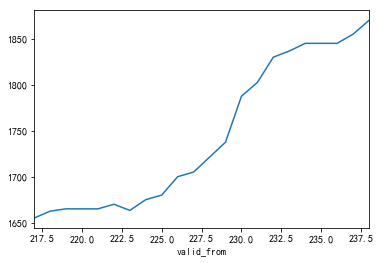

(1, 90, 9)


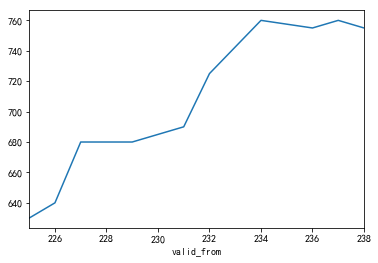

(1, 91, 9)


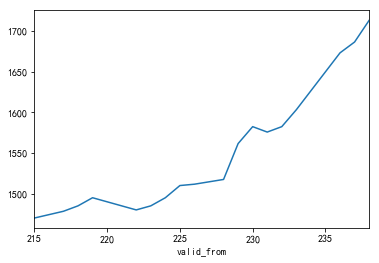

(1, 92, 8)


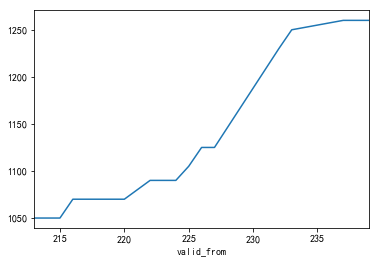

(1, 92, 9)


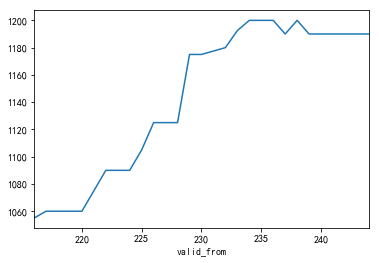

(1, 93, 9)


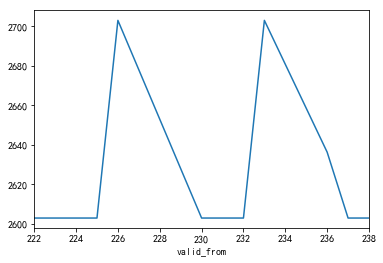

(1, 94, 8)


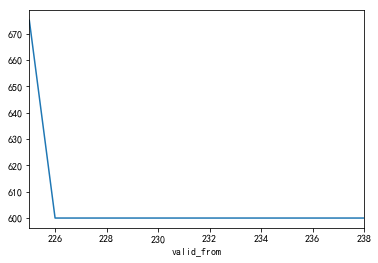

(1, 94, 9)


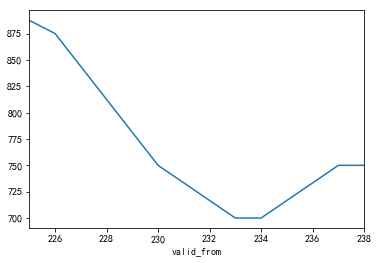

(1, 95, 9)


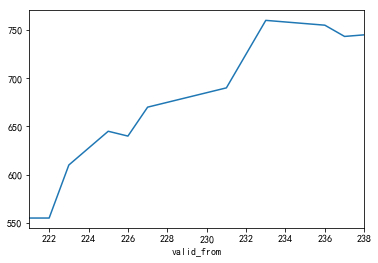

(1, 96, 8)


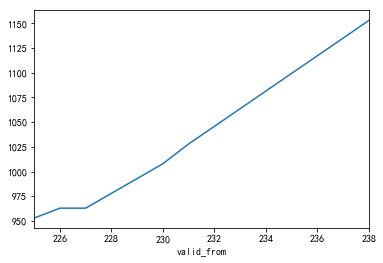

(1, 96, 9)


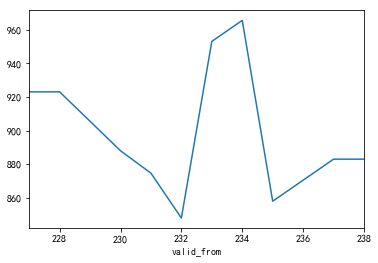

(2, 0, 8)


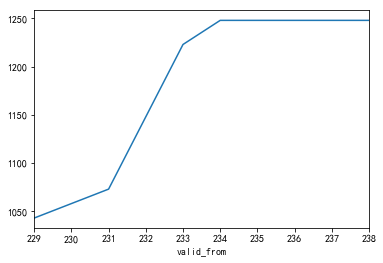

(2, 0, 9)


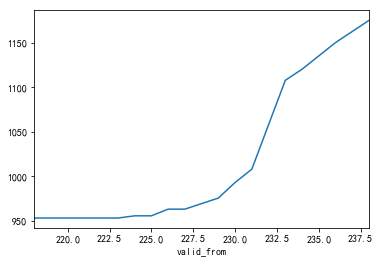

(2, 1, 9)


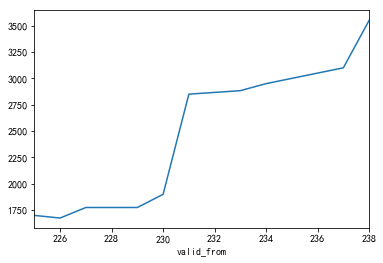

(2, 2, 9)


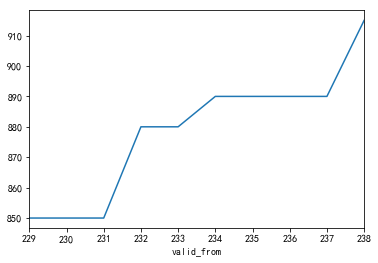

(2, 3, 9)


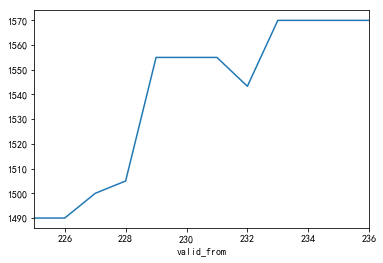

(2, 4, 8)


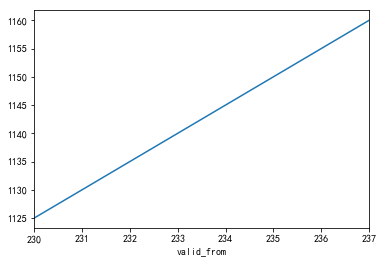

(2, 4, 9)


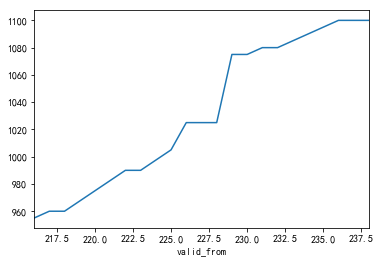

(2, 5, 9)


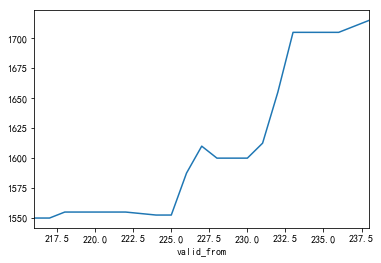

(2, 6, 9)


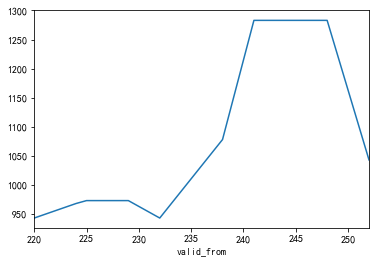

(2, 7, 9)


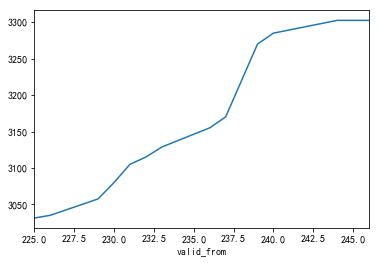

(2, 8, 8)


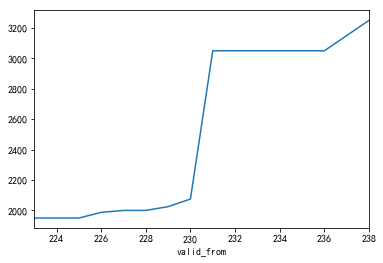

(2, 8, 9)


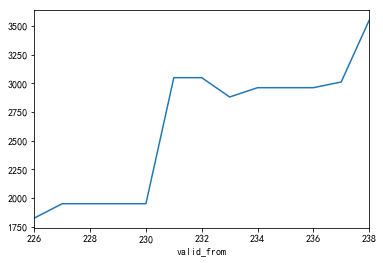

(2, 9, 8)


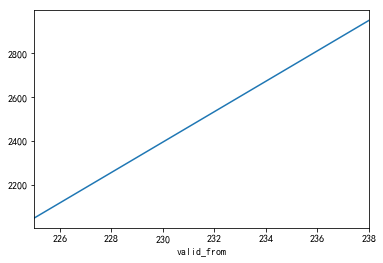

(2, 9, 9)


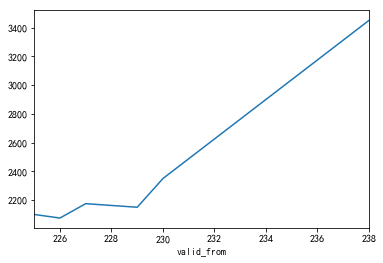

(2, 10, 9)


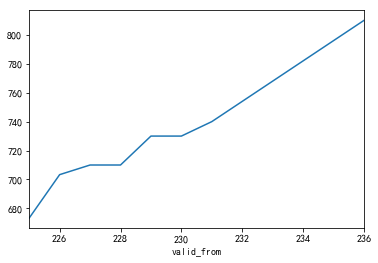

(2, 11, 8)


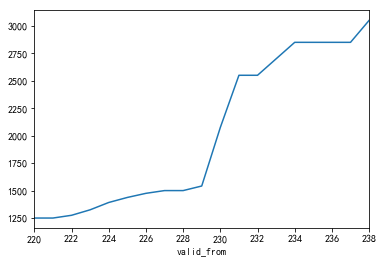

(2, 11, 9)


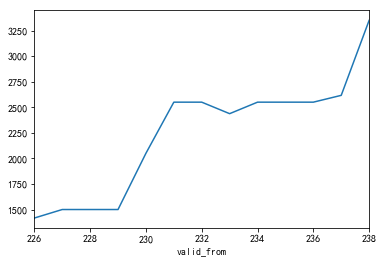

(2, 12, 9)


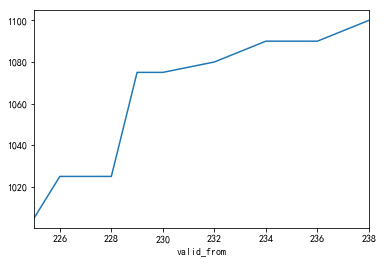

(2, 13, 8)


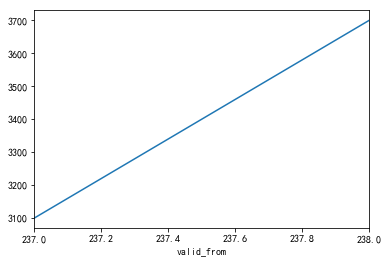

(2, 13, 9)


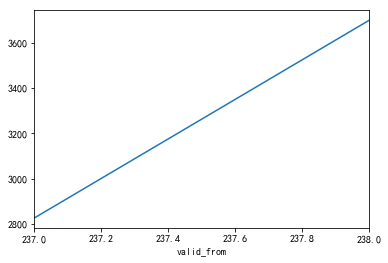

(2, 14, 9)


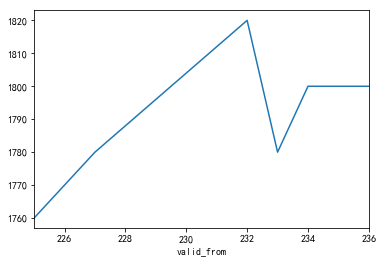

(2, 15, 8)


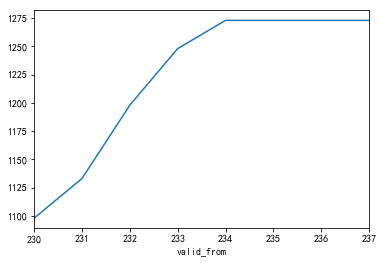

(2, 15, 9)


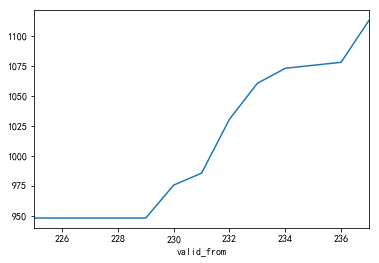

(2, 16, 9)


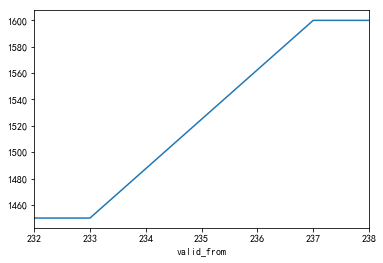

(2, 17, 9)


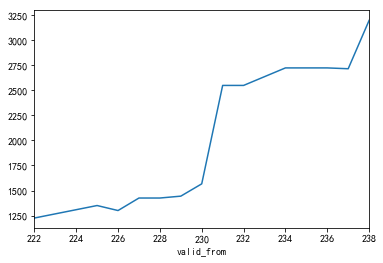

(2, 18, 8)


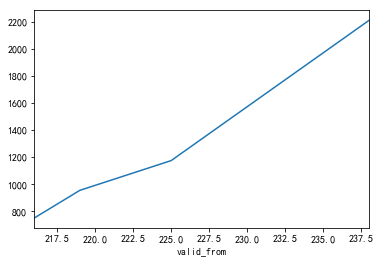

(2, 18, 9)


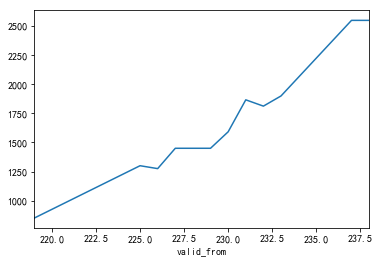

(2, 19, 8)


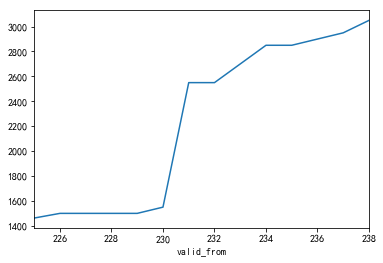

(2, 19, 9)


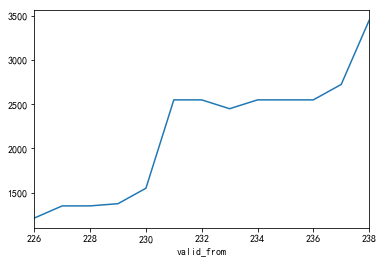

(2, 20, 9)


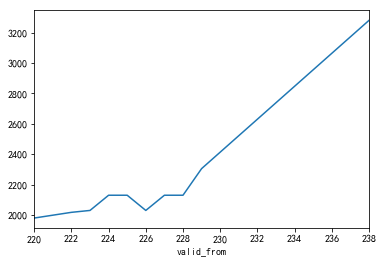

(2, 21, 9)


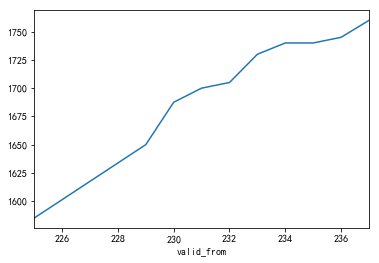

(2, 22, 9)


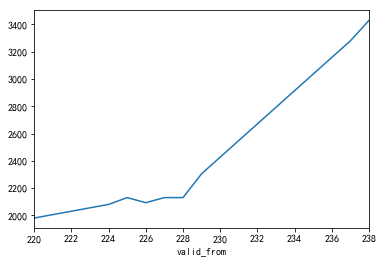

(2, 23, 9)


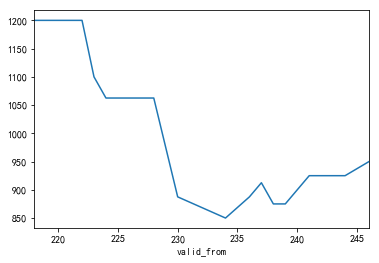

(2, 24, 9)


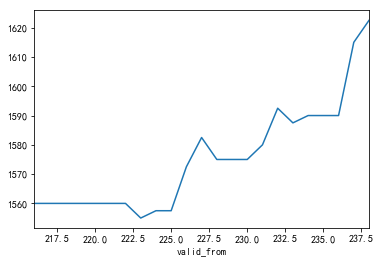

(2, 25, 9)


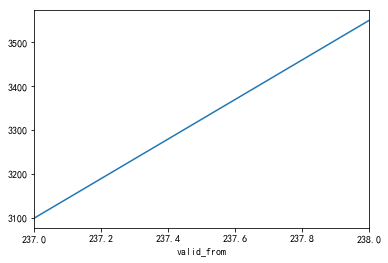

(2, 26, 9)


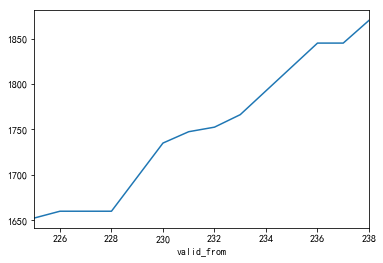

(2, 27, 9)


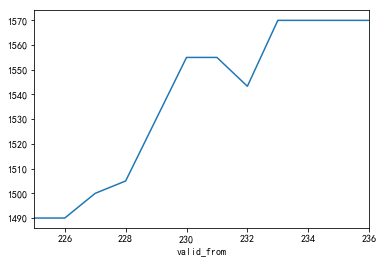

(2, 28, 9)


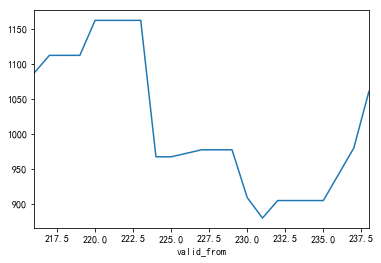

(2, 29, 9)


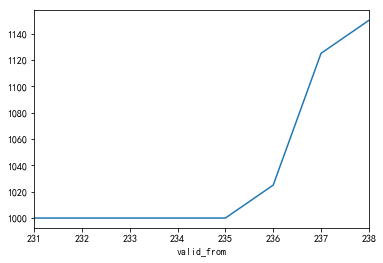

(2, 30, 9)


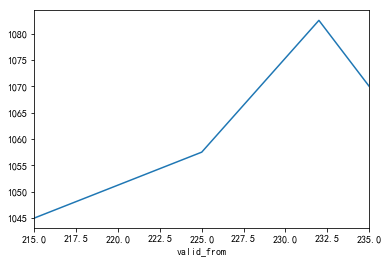

(2, 31, 9)


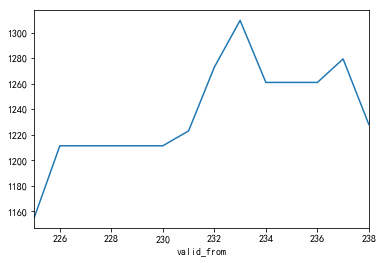

(2, 32, 9)


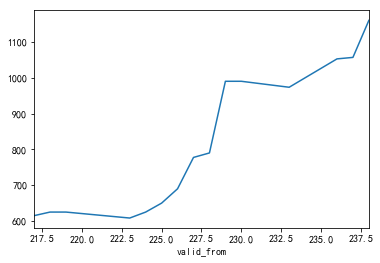

(2, 33, 9)


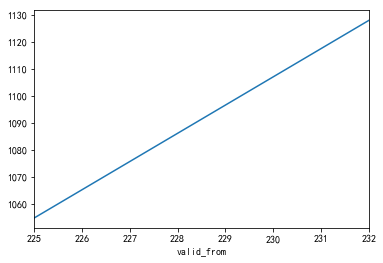

(2, 34, 9)


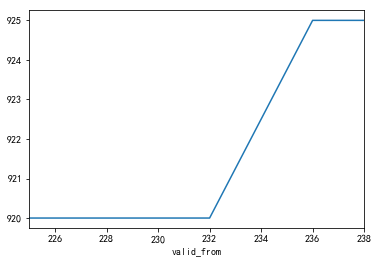

(2, 36, 9)


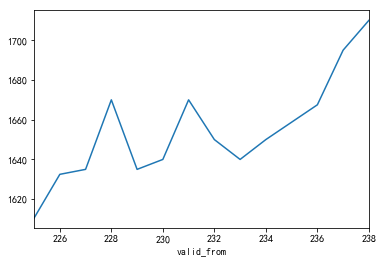

(2, 37, 9)


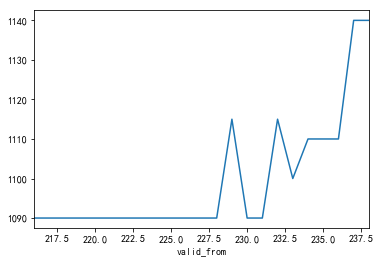

(2, 38, 9)


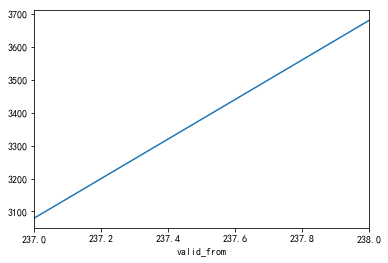

(2, 39, 9)


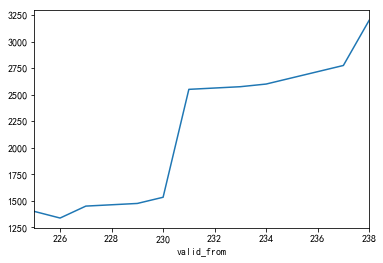

(2, 40, 9)


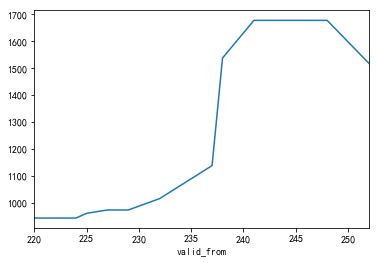

(2, 41, 8)


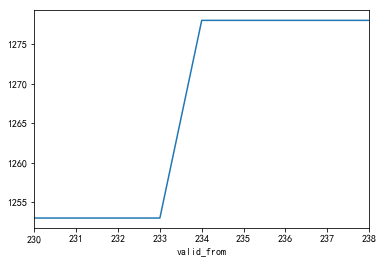

(2, 41, 9)


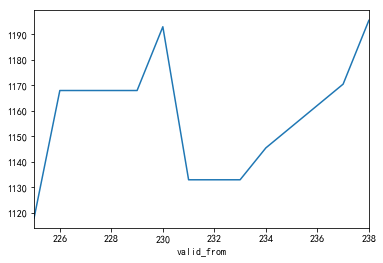

(2, 42, 8)


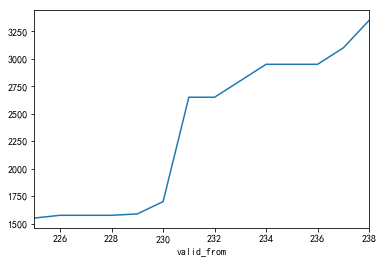

(2, 42, 9)


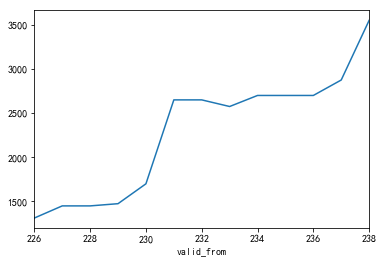

(2, 43, 8)


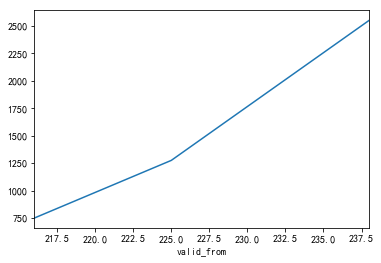

(2, 43, 9)


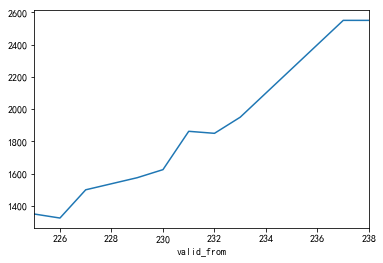

(2, 44, 8)


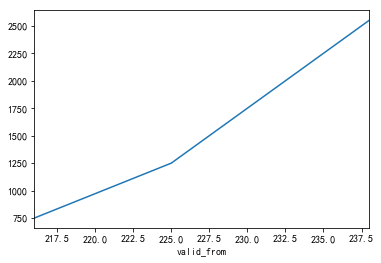

(2, 44, 9)


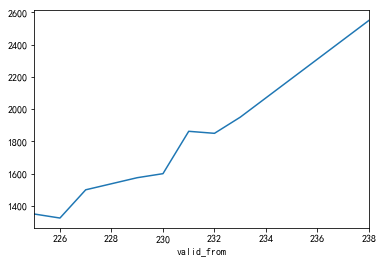

(2, 45, 8)


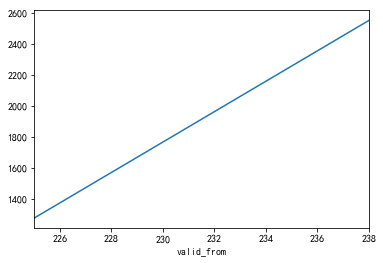

(2, 45, 9)


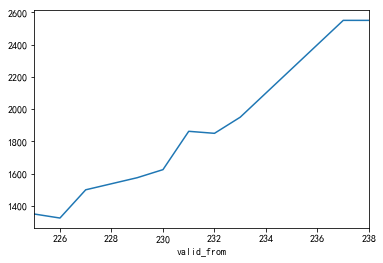

(2, 46, 9)


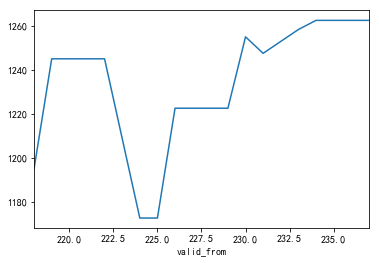

(2, 47, 9)


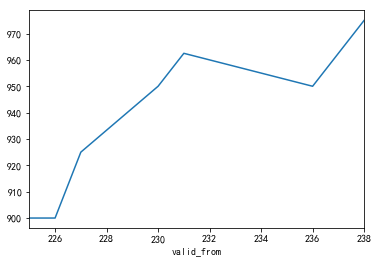

(2, 48, 8)


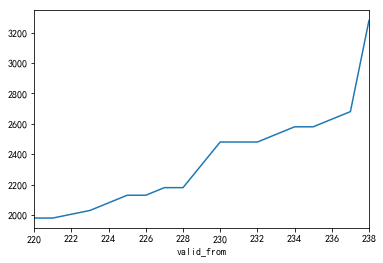

(2, 48, 9)


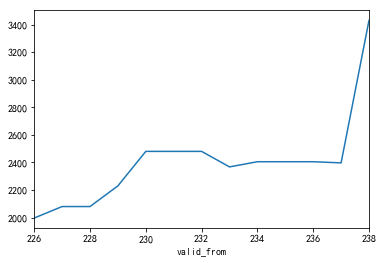

(2, 49, 9)


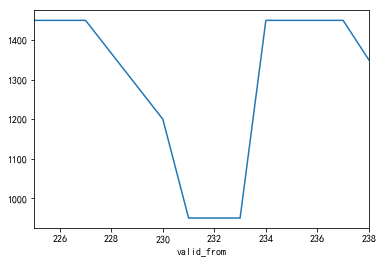

(2, 50, 8)


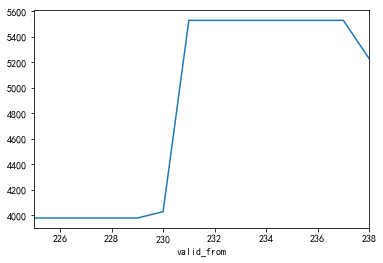

(2, 50, 9)


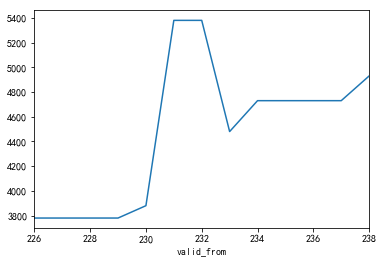

(2, 51, 9)


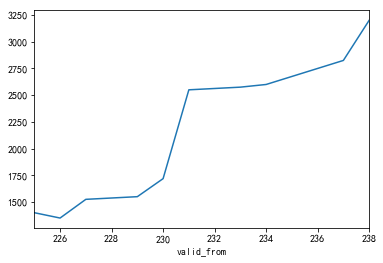

(2, 52, 9)


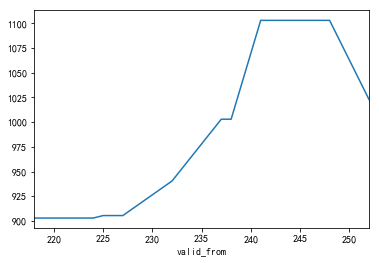

(2, 53, 8)


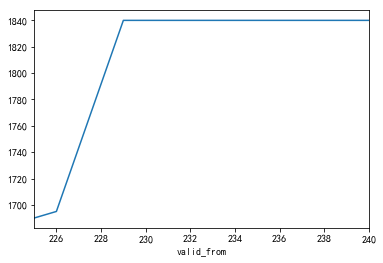

(2, 53, 9)


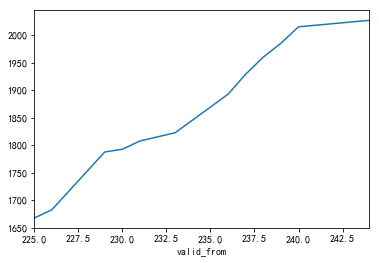

(2, 54, 9)


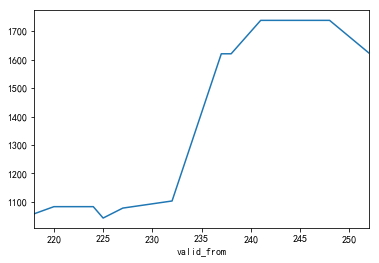

(2, 55, 9)


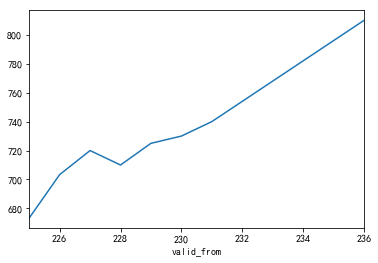

(2, 56, 9)


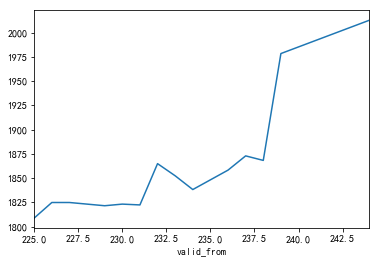

(2, 57, 8)


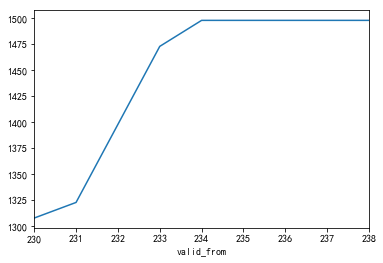

(2, 57, 9)


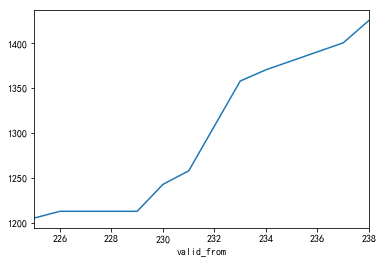

(2, 58, 9)


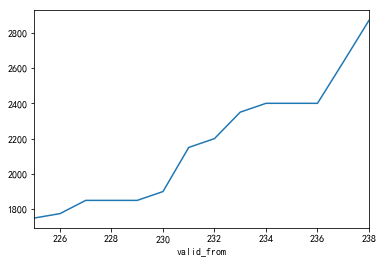

(2, 59, 9)


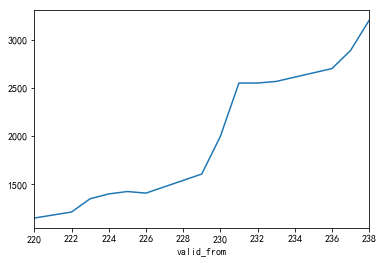

(2, 60, 9)


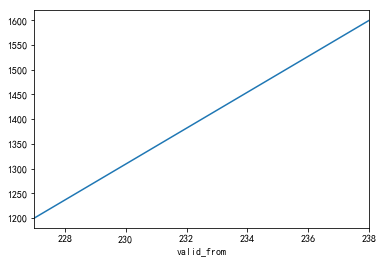

(2, 61, 9)


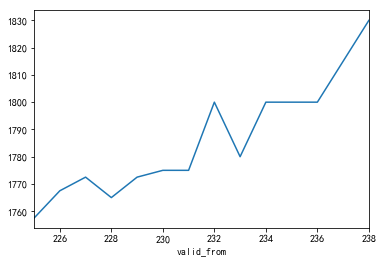

(2, 62, 9)


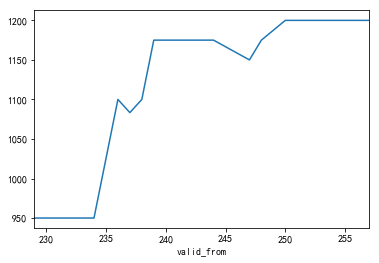

(2, 63, 8)


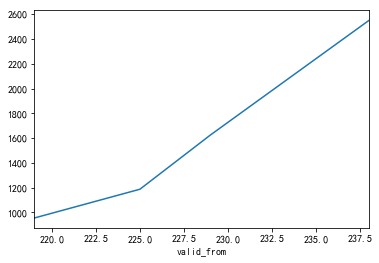

(2, 63, 9)


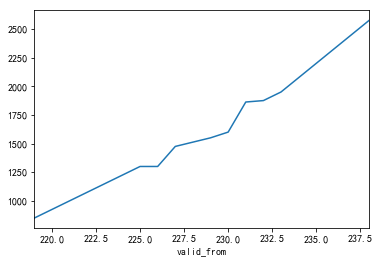

(2, 65, 9)


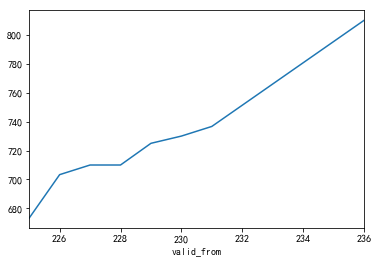

(2, 66, 9)


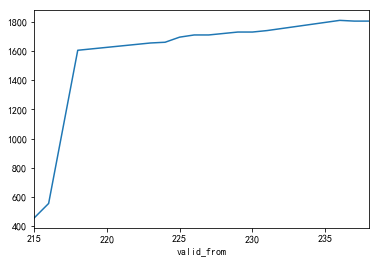

(2, 67, 8)


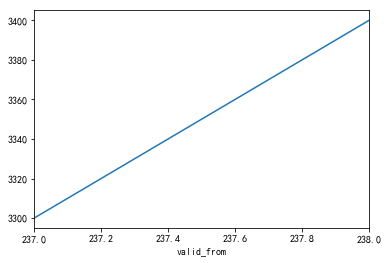

(2, 67, 9)


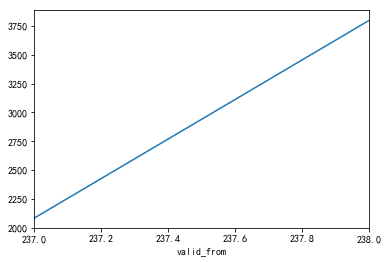

(2, 68, 8)


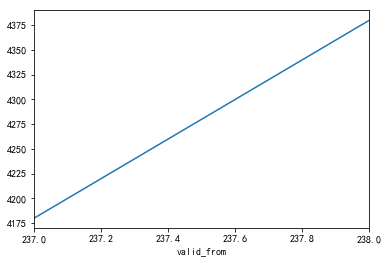

(2, 68, 9)


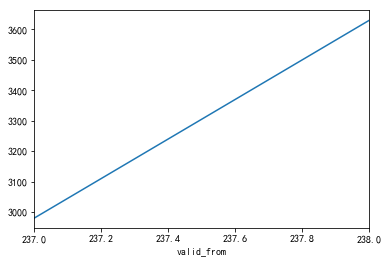

(2, 69, 9)


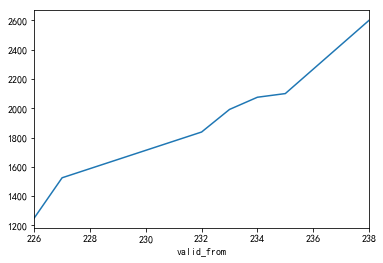

(2, 70, 9)


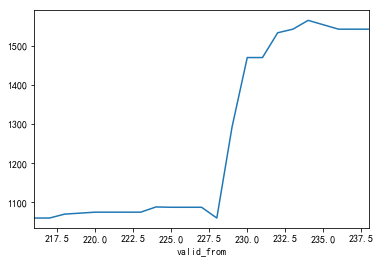

(2, 71, 9)


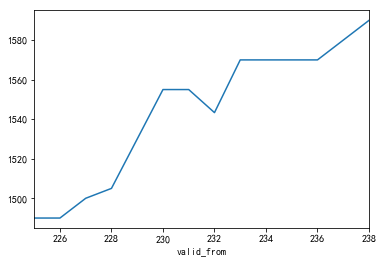

(2, 72, 8)


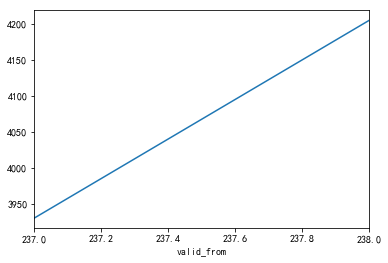

(2, 72, 9)


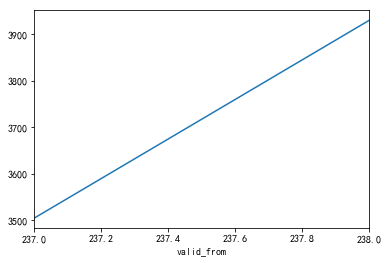

(2, 73, 9)


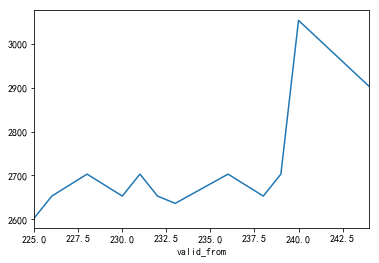

(2, 74, 8)


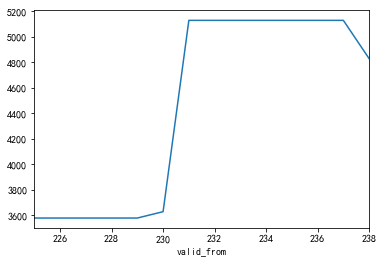

(2, 74, 9)


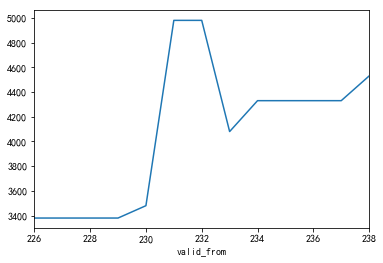

(2, 75, 8)


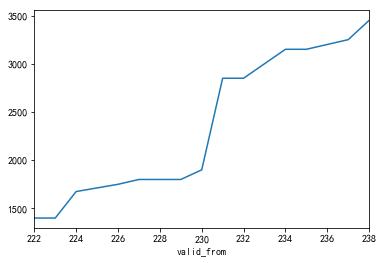

(2, 75, 9)


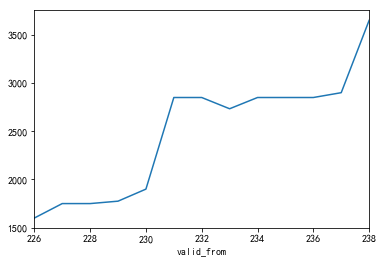

(2, 76, 8)


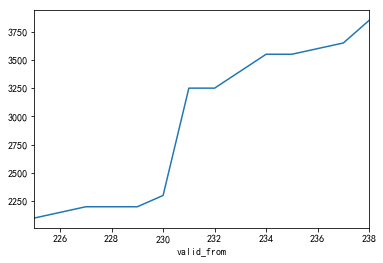

(2, 76, 9)


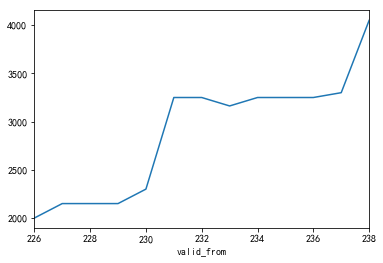

(2, 77, 9)


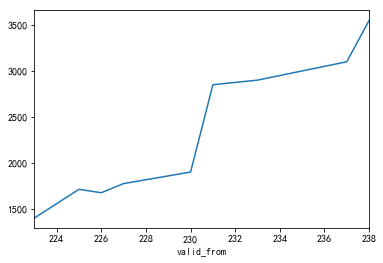

(2, 78, 8)


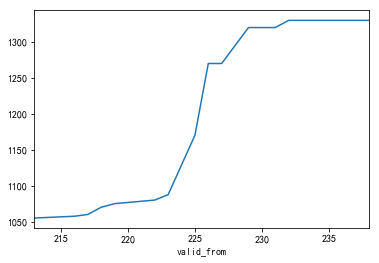

(2, 78, 9)


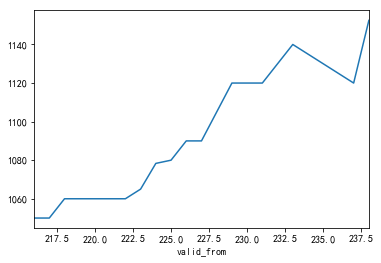

(2, 79, 9)


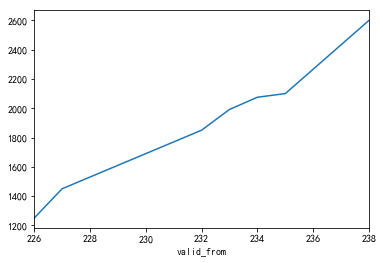

(2, 80, 8)


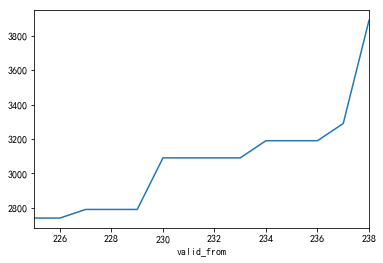

(2, 80, 9)


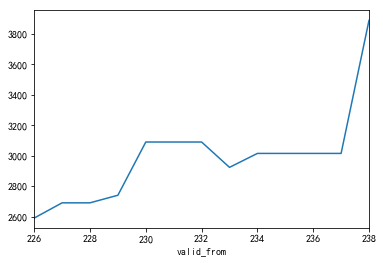

(2, 81, 9)


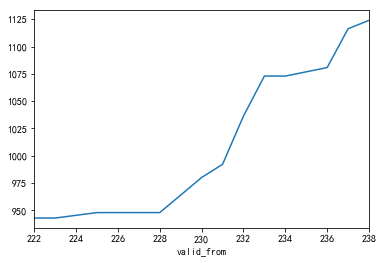

(2, 82, 8)


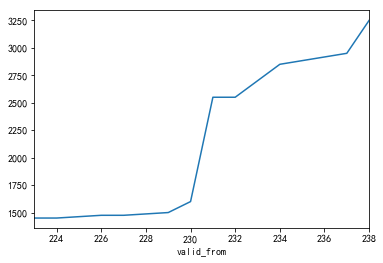

(2, 82, 9)


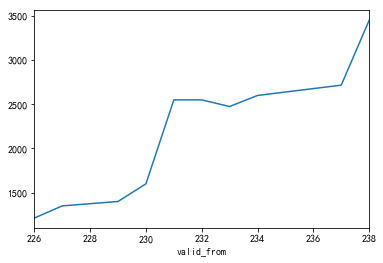

(2, 83, 8)


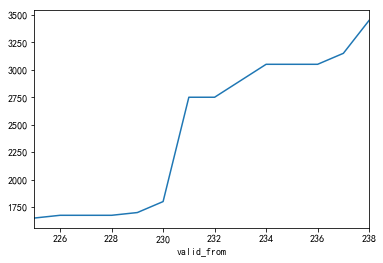

(2, 83, 9)


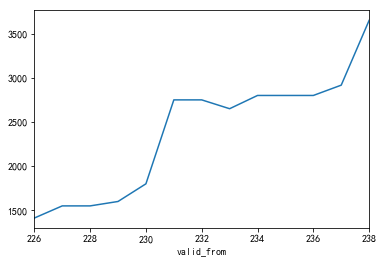

(2, 85, 8)


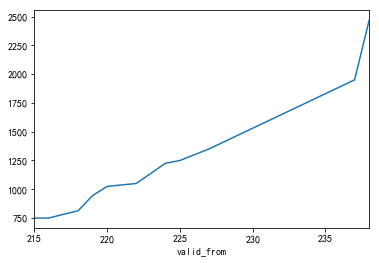

(2, 85, 9)


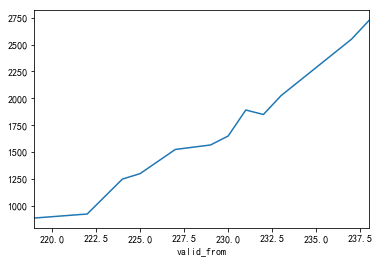

(2, 86, 9)


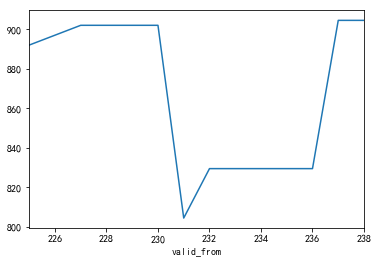

(2, 87, 9)


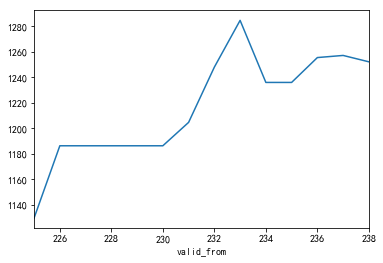

(2, 88, 9)


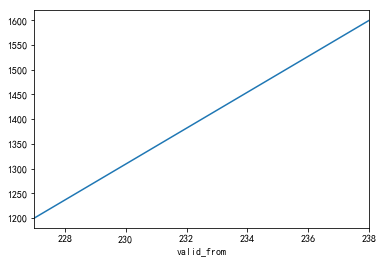

(2, 89, 9)


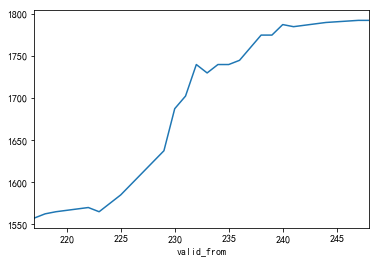

(2, 90, 9)


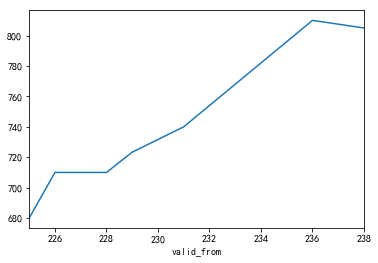

(2, 91, 8)


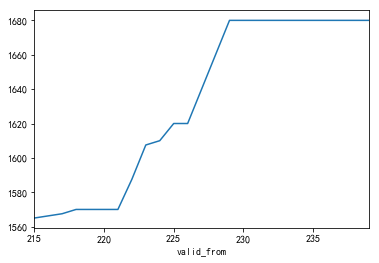

(2, 91, 9)


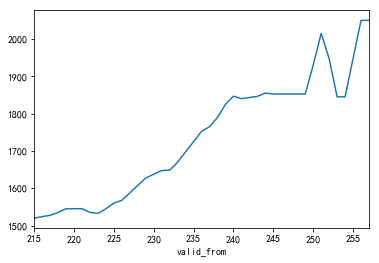

(2, 92, 9)


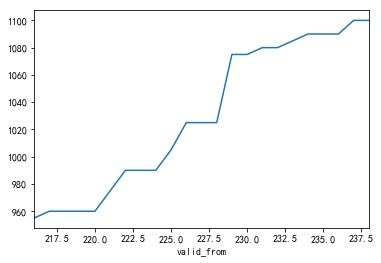

(2, 93, 9)


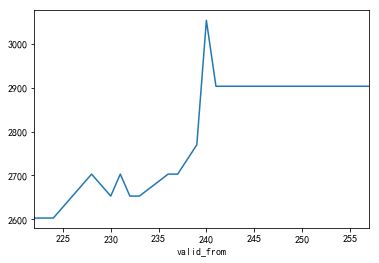

(2, 94, 9)


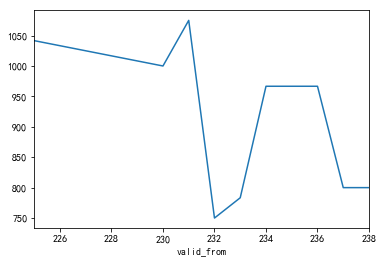

(2, 95, 9)


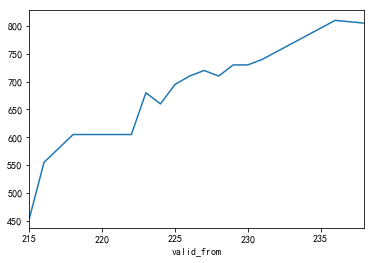

(2, 96, 9)


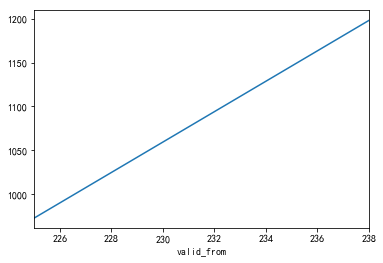

(3, 0, 9)


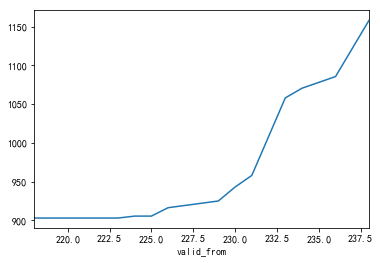

(3, 1, 9)


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [67]:
group=df_col.groupby(['pol_name','pod_name','etd'])
for g in group:
    print(g[0])
    df = g[1]
    df = df.sort_values(by=['valid_from'])
    #print(df)
    df_plot = df.groupby(['valid_from'])['price'].mean()
    df_plot.plot()
    plt.show()

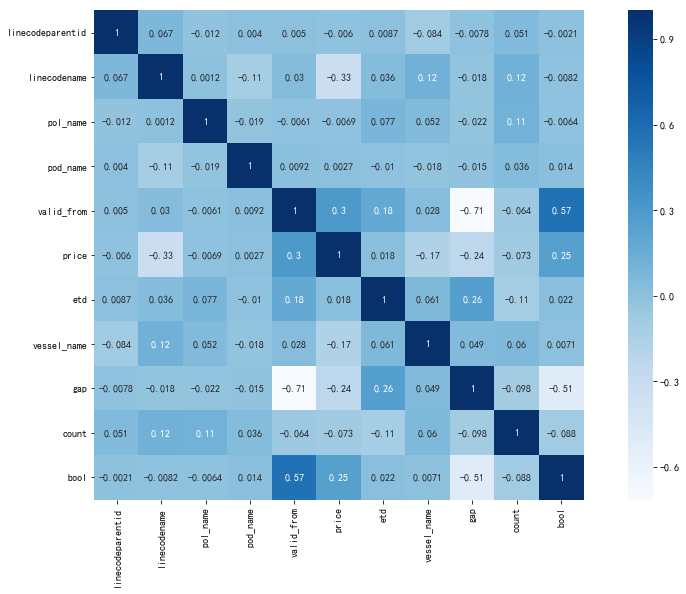

In [14]:
import seaborn as sns
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(16, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    #plt.savefig('./BluesStateRelation.png')
    plt.show()
#sns.pairplot(df) 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
test(df_col)

In [15]:
x =df_col.drop('bool',axis =1)
y =df_col['bool']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [16]:
#from sklearn import tree, svm, naive_bayes,neighbors
#from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:

from sklearn import tree, svm, naive_bayes,neighbors
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

clfs = {'svm': svm.SVC(),\
        'decision_tree':tree.DecisionTreeClassifier(),
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5), \
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),
        'random_forest' : RandomForestClassifier(n_estimators=50),\
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
        }

def try_different_method(clf):
    clf.fit(x_train,y_train.ravel())
    score = clf.score(x_test,y_test.ravel())
    print('the score is :', score)

for clf_key in clfs.keys():
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    try_different_method(clf)

the classifier is : svm
the score is : 0.8411810411810412
the classifier is : decision_tree
the score is : 0.896969696969697
the classifier is : naive_gaussian
the score is : 0.813053613053613
the classifier is : naive_mul
the score is : 0.6407148407148407
the classifier is : K_neighbor
the score is : 0.857031857031857
the classifier is : bagging_knn
the score is : 0.8679098679098679
the classifier is : bagging_tree
the score is : 0.8997668997668997
the classifier is : random_forest
the score is : 0.9202797202797203
the classifier is : adaboost
the score is : 0.8304584304584305
the classifier is : gradient_boost
the score is : 0.832012432012432


In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knc = KNN(n_neighbors =6,)
knc.fit(x_train,y_train)
knn_predict = knc.predict(x_test)

print('KNN 准确率: %f,准确率: %f,召回率: %f,F1: %f'
      %(knc.score(x_test,y_test),precision_score(y_test, y_predict,  average='macro'),recall_score(y_test, y_predict,  average='macro'),f1_score(y_test, y_predict,  average='macro')))

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
print('随机森林 准确率: %f,准确率: %f,召回率: %f,F1: %f'
      %(rfc.score(x_test,y_test),precision_score(y_test, y_predict,  average='macro'),recall_score(y_test, y_predict,  average='macro'),f1_score(y_test, y_predict,  average='macro')))

KNN 准确率: 0.842424,准确率: 0.919227,召回率: 0.915051,F1: 0.917066
随机森林 准确率: 0.922611,准确率: 0.919227,召回率: 0.915051,F1: 0.917066


In [20]:
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, knn_predict, target_names=target_names))

              precision    recall  f1-score   support

           1       0.84      0.94      0.88      4123
           0       0.86      0.67      0.75      2312

    accuracy                           0.84      6435
   macro avg       0.85      0.80      0.82      6435
weighted avg       0.84      0.84      0.84      6435



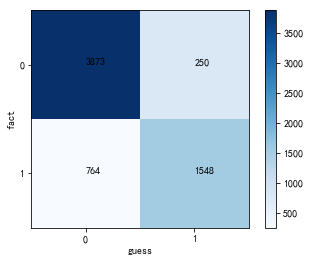

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
 
guess = knn_predict
fact = y_test
classes = list(set(fact))
classes.sort()
confusion = confusion_matrix(guess, fact)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()

30867    2130.0
16195    3550.0
26317    1243.0
24139     925.0
28323     858.0
19397    1153.0
13739    1200.0
5755     1350.0
32467    1073.0
14037    1511.0
27109     975.0
22262    1900.0
22253    2330.0
11983    1510.0
6147     2100.0
10408    1025.0
22206     630.0
16574    1650.0
11820    1430.0
31477    1650.0
27148    1505.0
21142    1860.0
12026    1445.0
19468    1187.0
19848     903.0
6932     2750.0
4977     2703.0
4489     3110.0
2835     1150.0
31717    1905.0
          ...  
17634    1960.0
24188    1745.0
9584     2150.0
9639     2800.0
11185    1300.0
4589     2270.0
8533     1705.0
1332     1675.0
23660    1575.0
27308    2210.0
6439     3930.0
11758    1195.0
22264    2300.0
24152     900.0
23467    1200.0
2445     1153.0
23044    1510.0
20631    1435.0
8104     1590.0
11252     717.0
3263     1400.0
26657    3000.0
8892     3100.0
19066    1118.0
16127    1510.0
23166    1675.0
22991    1445.0
26512    3100.0
21652    1800.0
7811     1233.0
Name: price, Length: 150

<Figure size 3600x2160 with 0 Axes>

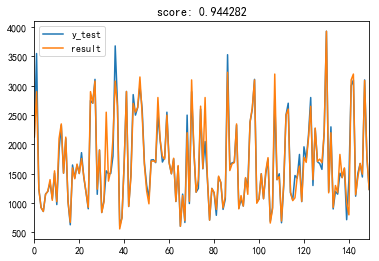

In [92]:
x =df_col.drop(['price','bool','valid_from'],axis =1)
y =df_col['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =1)
def try_different_method(clf):
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    data_plot =pd.DataFrame()
    data_plot['y_test'] =y_test[:150]
    
    data_plot = data_plot.reset_index(drop=True)
    data_plot['result'] =result[:150]
    print(y_test[:150])
    plt.figure(figsize=(50,30))
    data_plot.plot()
    
    plt.title('score: %f'%score)
    plt.legend()
    #plt.show()
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_different_method(tree_reg)

30867    2130.0
16195    3550.0
26317    1243.0
24139     925.0
28323     858.0
19397    1153.0
13739    1200.0
5755     1350.0
32467    1073.0
14037    1511.0
27109     975.0
22262    1900.0
22253    2330.0
11983    1510.0
6147     2100.0
10408    1025.0
22206     630.0
16574    1650.0
11820    1430.0
31477    1650.0
27148    1505.0
21142    1860.0
12026    1445.0
19468    1187.0
19848     903.0
6932     2750.0
4977     2703.0
4489     3110.0
2835     1150.0
31717    1905.0
          ...  
17634    1960.0
24188    1745.0
9584     2150.0
9639     2800.0
11185    1300.0
4589     2270.0
8533     1705.0
1332     1675.0
23660    1575.0
27308    2210.0
6439     3930.0
11758    1195.0
22264    2300.0
24152     900.0
23467    1200.0
2445     1153.0
23044    1510.0
20631    1435.0
8104     1590.0
11252     717.0
3263     1400.0
26657    3000.0
8892     3100.0
19066    1118.0
16127    1510.0
23166    1675.0
22991    1445.0
26512    3100.0
21652    1800.0
7811     1233.0
Name: price, Length: 150

<Figure size 3600x2160 with 0 Axes>

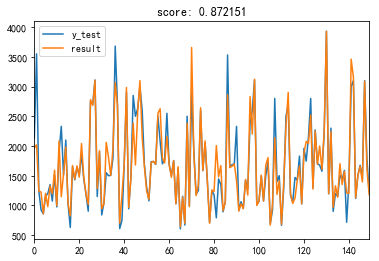

In [93]:
knn = neighbors.KNeighborsRegressor()
try_different_method(knn)

In [75]:
# design network
  #跑了最新的马士基价格数据，回归拟合率84%
    #提前预知时间  专家意见 (王毅 王孝飞)
    #  信息差 
    #  
    
    #50中位数 基准  过减100美金
    # 最大收益   抢到价-最低价
    #
#回归 
from keras.layers import concatenate

x =x.values
y=y.values

model =models.Sequential()

model.add(layers.LSTM(50,input_shape =(x_train.shape[1],x_train.shape[2])))
model.add(layers.Dense(1))


model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(x_test)
x_test= x_test.reshape((x_test.shape[0], x_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = test_y.reshape((len(y_test), 1))
inv_y = concatenate((y_test, x_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [76]:
data_20gp_col.head()

linecodeparentid linecodename pol_name     pod_name valid_from   price  \
737             18843           欧洲   NANSHA    ROTTERDAM 2020-08-18   933.0   
739             18849           中东  QINGDAO       DAMMAN 2020-08-14   932.0   
741             18849           中东  QINGDAO       DAMMAN 2020-08-04   862.0   
744             18843           欧洲   NANSHA  SOUTHAMPTON 2020-08-20  1178.0   
745             18843           欧洲  HUANGPU    ROTTERDAM 2020-08-21  1098.0   

           etd   vessel_name voyage  gap  
737 2020-09-06  APL SANTIAGO   035W   19  
739 2020-09-11  APL SANTIAGO   035W   28  
741 2020-09-06  APL SANTIAGO   035W   33  
744 2020-09-06  APL SANTIAGO   035W   17  
745 2020-09-02  APL SANTIAGO   035W   12

In [77]:
data_20gp_col.to_csv('train.csv',encoding ='gb18030')

In [2]:
import pandas as pd
pd.to_datetime('Fri, 25 Sep 2020 10:22:55 +0800')

Timestamp('2020-09-25 10:22:55+0800', tz='pytz.FixedOffset(480)')

In [ ]:
data =pd